In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Processamento/Tratamento de Dados

In [2]:
#IMPORTAÇÃO DATASET SIVANA - PRIMÁRIO
df_prim = pd.read_excel('DATASET_07_05_2021-17hs_a_19hs.xls')

In [3]:
#EXTRAÇÃO DO PRIMEIRO E QUINTO DIGITO DAS PLACAS
df_prim['Placa'] = df_prim['Placa'].astype(str)
df_prim['1_Letra'] = df_prim['Placa'].str.get(0)
df_prim['5_Dígito'] = df_prim['Placa'].str.get(4)

In [4]:
#APLICANDO HASH NA COLUNA PLACAS
df_prim['PlacaHash'] = pd.util.hash_pandas_object(df_prim['Placa'], index=False)

In [5]:
df_prim.columns

Index(['Nr', 'Placa', 'Leitura', 'Placa Correta', 'Data Hora', 'Operadora',
       'Praça', 'Sentido', 'Dia da Semana', 'Categoria', 'Conf', '1_Letra',
       '5_Dígito', 'PlacaHash'],
      dtype='object')

In [6]:
#REORDENANDO COLUNAS
df_prim = df_prim.reindex(columns=['Nr', 'Placa','PlacaHash','1_Letra','5_Dígito','Leitura', 'Placa Correta', 'Data Hora', 'Operadora',
       'Praça', 'Sentido', 'Dia da Semana', 'Categoria', 'Conf'])

In [7]:
#RETIRANDO COLUNAS 'Placa' e 'Placa Correta'
df_prim.drop(['Placa','Placa Correta'], axis=1, inplace=True)

In [8]:
#EXPORTANDO DATASET PARA TCC
df_prim.to_excel('df_prim.xlsx', encoding='utf-8', index=False)

In [9]:
df_prim.head(3)

,Nr,PlacaHash,1_Letra,5_Dígito,Leitura,Data Hora,Operadora,Praça,Sentido,Dia da Semana,Categoria,Conf
0,1,16818951966726593698,A,3,0,07/05/2021 17:00,RFB,Guaíra RFB,Mundo Novo > Guaíra,Sexta,nac:BRA_face:T_conf:,87
1,2,4578175391450274026,D,G,0,07/05/2021 17:00,RFB,Guaíra RFB,Mundo Novo > Guaíra,Sexta,nac:BRA_face:T_conf:,78
2,3,7385877233923986733,D,G,1,07/05/2021 17:00,RFB,Guaíra RFB,Mundo Novo > Guaíra,Sexta,nac:BRA_face:T_conf:,82


In [10]:
#IMPORTAÇÃO DATASET RENAVAM - SECUNDÁRIO
df_sec = pd.read_excel('DATASET_07_05_2021-17hs_a_19hs_RENAVAM.xls')

In [11]:
#APLICANDO HASH NA COLUNA PLACAS
df_sec['PlacaHash'] = pd.util.hash_pandas_object(df_sec['PLACA'], index=False)

In [12]:
df_sec.columns

Index(['UF', 'PLACA', 'MUNICIPIO', 'MARCA/MODELO', 'TIPO NI', 'CNPJ/CPF',
       'TIPO-VEICULO', 'COR', 'ANO-MODELO', 'ANO-FABRICACAO',
       'ULT-ATUALIZACAO', 'SITUACAO', 'RESTRICOES', 'PlacaHash'],
      dtype='object')

In [13]:
#REORDENANDO COLUNAS
df_sec = df_sec.reindex(columns=['PLACA', 'PlacaHash', 'MUNICIPIO','UF', 'MARCA/MODELO', 'TIPO NI', 'CNPJ/CPF',
       'TIPO-VEICULO', 'COR', 'ANO-MODELO', 'ANO-FABRICACAO',
       'ULT-ATUALIZACAO', 'SITUACAO', 'RESTRICOES'])

In [14]:
#RETIRANDO COLUNAS 'PLACA','TIPO NI','CNPJ/CPF'
df_sec.drop(['PLACA','TIPO NI','CNPJ/CPF'], axis=1, inplace=True)

In [15]:
#EXPORTANDO DATASET PARA TCC
df_sec.to_excel('df_sec.xlsx', encoding='utf-8', index=False)

In [16]:
df_sec.head(3)

,PlacaHash,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-MODELO,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES
0,16818951966726593698,NOVA SANTA HELENA,MT,SR/GUERRA AG GR,S.REBOQUE,BRANCA,2010.0,2010.0,25/01/2019,CIRCULACAO,NAO HA
1,4578175391450274026,JAPORA,MS,TOYOTA/COROLLA XEI18VVT,AUTOMOVEL,PRETA,2005.0,2005.0,23/02/2021,CIRCULACAO,NAO HA| ...
2,7385877233923986733,SAO JOSE DO RIO PRETO,SP,VW/PARATI 1.6 TRACKFIELD,AUTOMOVEL,PRETA,2008.0,2007.0,09/12/2020,CIRCULACAO,NAO HA


In [17]:
#MERGE
df = pd.merge(df_prim,df_sec,how='inner', on='PlacaHash')

In [18]:
#EXPORTANDO DATASET PARA TCC
df.to_excel('df.xlsx', encoding='utf-8', index=False)

In [19]:
#SEPARANDO COLUNA DATA E HORA
df[['Data', 'Hora']] = df['Data Hora'].str.split(" ", expand=True)

In [20]:
df.columns

Index(['Nr', 'PlacaHash', '1_Letra', '5_Dígito', 'Leitura', 'Data Hora',
       'Operadora', 'Praça', 'Sentido', 'Dia da Semana', 'Categoria', 'Conf',
       'MUNICIPIO', 'UF', 'MARCA/MODELO', 'TIPO-VEICULO', 'COR', 'ANO-MODELO',
       'ANO-FABRICACAO', 'ULT-ATUALIZACAO', 'SITUACAO', 'RESTRICOES', 'Data',
       'Hora'],
      dtype='object')

In [21]:
#ELIMINANDO COLUNAS CUJO VALOR É O MESMO PARA TODAS AS LINHAS - SEM VALOR PREDITIVO
df.drop(['Nr', 'Data Hora', 'Operadora','Praça', 'Sentido',
         'Dia da Semana','Categoria', 'Data'], axis=1, inplace=True)

In [22]:
#ANÁLISE PARA ESCOLHER ENTRE COLUNA ANO MODELO E ANO FABRICAÇÃO
#ANO MODELO possui 35 registros = 0, enquanto ANO FABRICAÇÃO não possui nenhum
#Registros ANO FABRICAÇÃO são mais consistentes
df[df['ANO-MODELO']==0].agg(['count'])

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-MODELO,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
count,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


In [23]:
df[df['ANO-FABRICACAO']==0].agg(['count'])

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-MODELO,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.drop(['ANO-MODELO'], axis=1, inplace=True)

## 3.1 Análise dos missing values 

In [25]:
#Coluna MUNICIPIO
#29 registros são leituras incorretas que não correspondem a nenhum veículo existente na base Renavam
df[df['MUNICIPIO']=='SEM REGISTRO RENAVAM'].agg(['count'])

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
count,29,29,29,29,29,29,29,0,0,0,0,0,0,0,29


In [26]:
#Além dos 29 registros == 'SEM REGISTRO RENAVAM', não há mais nenhum missing value
#Portanto, todos os missing values são oriundos da leitura incorreta
df[(df['MUNICIPIO']!='SEM REGISTRO RENAVAM') & (df.isnull())].agg(['count'])

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#Substituindo registros em branco da coluna 'UF' por 'SR'
df['UF'] = df['UF'].replace([' '], 'SR')

In [28]:
#Substituindo registros 'NaN' da coluna 'TIPO-VEICULO' por 'miss'
df['TIPO-VEICULO'] = df['TIPO-VEICULO'].fillna('miss')

In [29]:
#Substituindo registros 'NaN' da coluna 'COR' por 'miss'
df['COR'] = df['COR'].fillna('miss')

In [30]:
#Substituindo registros 'NaN' da coluna 'ANO-FABRICACAO' por 1900
df['ANO-FABRICACAO'] = df['ANO-FABRICACAO'].fillna(1900)

In [31]:
#Eliminando linhas duplicadas
df[df.duplicated('PlacaHash', keep=False)]

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
103,13332146363560755659,E,I,0,91,BIRIGUI,SP,GM/ZAFIRA EXPRESSION,AUTOMOVEL,PRATA,2010.0,25/08/2020,CIRCULACAO,ALIENACAO FIDUCIARIA,17:12
104,13332146363560755659,E,I,0,96,BIRIGUI,SP,GM/ZAFIRA EXPRESSION,AUTOMOVEL,PRATA,2010.0,25/08/2020,CIRCULACAO,ALIENACAO FIDUCIARIA,18:21
136,8145674836525234550,H,1,0,92,GUAIRA,PR,HONDA/CIVIC EXS FLEX,AUTOMOVEL,PRATA,2007.0,02/05/2017,CIRCULACAO,NAO HA,17:17
137,8145674836525234550,H,1,0,85,GUAIRA,PR,HONDA/CIVIC EXS FLEX,AUTOMOVEL,PRATA,2007.0,02/05/2017,CIRCULACAO,NAO HA,18:23


In [32]:
df.drop_duplicates(subset=['PlacaHash'], inplace=True)

In [33]:
df

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,MUNICIPIO,UF,MARCA/MODELO,TIPO-VEICULO,COR,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora
0,16818951966726593698,A,3,0,87,NOVA SANTA HELENA,MT,SR/GUERRA AG GR,S.REBOQUE,BRANCA,2010.0,25/01/2019,CIRCULACAO,NAO HA,17:00
1,4578175391450274026,D,G,0,78,JAPORA,MS,TOYOTA/COROLLA XEI18VVT,AUTOMOVEL,PRETA,2005.0,23/02/2021,CIRCULACAO,NAO HA| ...,17:00
2,7385877233923986733,D,G,1,82,SAO JOSE DO RIO PRETO,SP,VW/PARATI 1.6 TRACKFIELD,AUTOMOVEL,PRETA,2007.0,09/12/2020,CIRCULACAO,NAO HA,17:00
3,3566830866020661058,K,3,1,75,RIO DE JANEIRO,RJ,HONDA/CG 125 FAN KS,MOTOCICLO,PRETA,2009.0,20/09/2018,CIRCULACAO,NAO HA,17:00
4,10185387699721257702,B,F,0,98,ASSIS CHATEAUBRIAND,PR,I/TOYOTA HILUX SWDMDA4JD,UTILITáRI,BRANCA,2020.0,28/09/2020,CIRCULACAO,NAO HA,17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,17587299226595135787,A,G,0,88,NAVIRAI,MS,I/VW AMAROK V6 HIGH AC4,CNETE,BRANCA,2018.0,26/10/2020,CIRCULACAO,ALIENACAO FIDUCIARIA,19:58
1196,5257374306946238258,I,D,1,82,MONTE CARLO,SC,SR/RANDON SR CA,S.REBOQUE,VERMELHA,2010.0,24/08/2017,CIRCULACAO,NAO HA,19:58
1197,4908375302694645005,I,D,0,75,GUARAPUAVA,PR,FIAT/UNO MILLE WAY ECON,AUTOMOVEL,VERMELHA,2010.0,17/09/2020,CIRCULACAO,NAO HA,19:59
1198,9907502954820475496,A,9,1,80,SAO JOAO,PR,HONDA/CG 125 TITAN,MOTOCICLO,AZUL,1998.0,22/04/2013,CIRCULACAO,NAO HA,19:59


## 4. Análise e Exploração dos Dados

In [34]:
#CONTAGEM DE FALSOS POSITIVOS
df['Leitura'].value_counts()

0    978
1    220
Name: Leitura, dtype: int64

In [35]:
#FREQUÊNCIA DE FALSOS POSITIVOS
df['Leitura'].value_counts(normalize=True)

0    0.816361
1    0.183639
Name: Leitura, dtype: float64

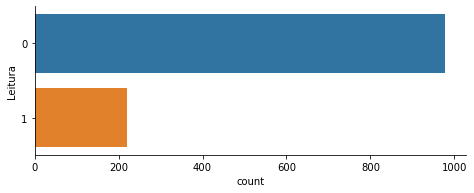

In [36]:
ax = sns.catplot(y="Leitura", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

## 4.1 Variável ‘1_Letra’ 

In [37]:
#ANÁLISE DE VARIÁVEL '1_LETRA'
#CONTAGEM '1_LETRA'
df['1_Letra'].value_counts().sort_index(ascending=True).to_frame()

,1_Letra
A,418
B,193
C,26
D,30
E,38
F,36
G,19
H,33
I,50
J,23


In [38]:
#IDENTIFICANDO 3 MAIORES FREQUÊNCIAS DE '1_LETRA'
df['1_Letra'].value_counts(normalize=True).sort_index(ascending=True).nlargest(3)

A    0.348915
B    0.161102
Q    0.077629
Name: 1_Letra, dtype: float64

In [39]:
#SOMANDO AS TRÊS MAIORES FREQUÊNCIAS
df['1_Letra'].value_counts(normalize=True).nlargest(3).sum()*100

58.764607679465776

In [40]:
#CONTAGEM DE FALSOS POSITIVOS, SEPARADOS POR '1_LETRA'
df.groupby(['1_Letra','Leitura']).size().to_frame()

0
1_Letra Leitura     
A       0        349
        1         69
B       0        169
        1         24
C       0         18
        1          8
D       0         18
        1         12
E       0         33
        1          5
F       0         28
        1          8
G       0         15
        1          4
H       0         29
        1          4
I       0         35
        1         15
J       0         21
        1          2
K       0         13
        1          2
L       0          7
        1          4
M       0         57
        1          5
N       0         33
        1          8
O       0         29
        1         14
P       0         19
        1          2
Q       0         76
        1         17
R       0         29
        1          7
U       1          6
W       1          3
X       1          1

In [41]:
#PERCENTUAL DE FALSOS POSITIVOS, SEPARADOS POR '1_LETRA'
df_percentual = df.groupby(['1_Letra','Leitura']).agg({'MUNICIPIO':'count'})[['MUNICIPIO']]
df_percentual['%'] = df_percentual.groupby(level=0).apply(lambda x: 100*x/x.sum())
df_percentual = df_percentual.rename(columns={'MUNICIPIO':'Quantidade'}).round(2)
df_percentual

Quantidade       %
1_Letra Leitura                    
A       0               349   83.49
        1                69   16.51
B       0               169   87.56
        1                24   12.44
C       0                18   69.23
        1                 8   30.77
D       0                18   60.00
        1                12   40.00
E       0                33   86.84
        1                 5   13.16
F       0                28   77.78
        1                 8   22.22
G       0                15   78.95
        1                 4   21.05
H       0                29   87.88
        1                 4   12.12
I       0                35   70.00
        1                15   30.00
J       0                21   91.30
        1                 2    8.70
K       0                13   86.67
        1                 2   13.33
L       0                 7   63.64
        1                 4   36.36
M       0                57   91.94
        1                 5    8.06
N       0                33   80.49
        1                 8   19.51
O       0                29   67.44
        1                14   32.56
P       0                19   90.48
        1                 2    9.52
Q       0                76   81.72
        1                17   18.28
R       0                29   80.56
        1                 7   19.44
U       1                 6  100.00
W       1                 3  100.00
X       1                 1  100.00

<AxesSubplot:xlabel='1_Letra', ylabel='Leitura'>

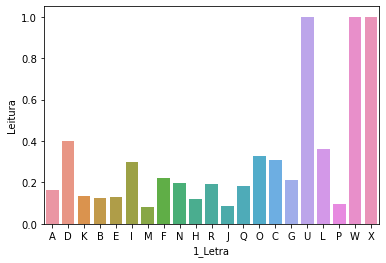

In [42]:
sns.barplot(x='1_Letra',y='Leitura', data=df, ci=False)

<AxesSubplot:xlabel='1_Letra', ylabel='count'>

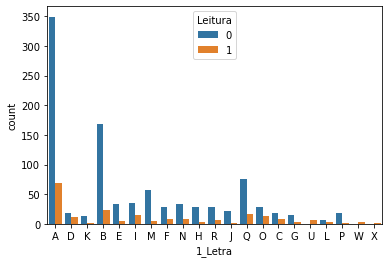

In [43]:
sns.countplot(x='1_Letra',data=df, hue = 'Leitura')

In [44]:
df_percentual = df_percentual.reset_index()

In [45]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de quantidade
df_falso_positivo = df_percentual[df_percentual['Leitura']==1].sort_values(by = 'Quantidade', ascending = False)
df_falso_positivo.head(10)

,1_Letra,Leitura,Quantidade,%
1,A,1,69,16.51
3,B,1,24,12.44
33,Q,1,17,18.28
17,I,1,15,30.00
29,O,1,14,32.56
7,D,1,12,40.00
11,F,1,8,22.22
5,C,1,8,30.77
27,N,1,8,19.51
35,R,1,7,19.44


In [46]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de percentual
df_falso_positivo.sort_values(by = '%', ascending = False)

,1_Letra,Leitura,Quantidade,%
36,U,1,6,100.00
37,W,1,3,100.00
38,X,1,1,100.00
7,D,1,12,40.00
23,L,1,4,36.36
29,O,1,14,32.56
5,C,1,8,30.77
17,I,1,15,30.00
11,F,1,8,22.22
13,G,1,4,21.05


In [47]:
#Agrupando as letras U, W e X em 'U-W-X'
df.loc[df['1_Letra'] == 'U', '1_Letra'] = 'U-W-X'
df.loc[df['1_Letra'] == 'W', '1_Letra'] = 'U-W-X'
df.loc[df['1_Letra'] == 'X', '1_Letra'] = 'U-W-X'

In [48]:
#Agrupando as letras D, L, O, C e I em 'D-L-O-C-I'
df.loc[df['1_Letra'] == 'D', '1_Letra'] = 'D-L-O-C-I'
df.loc[df['1_Letra'] == 'L', '1_Letra'] = 'D-L-O-C-I'
df.loc[df['1_Letra'] == 'O', '1_Letra'] = 'D-L-O-C-I'
df.loc[df['1_Letra'] == 'C', '1_Letra'] = 'D-L-O-C-I'
df.loc[df['1_Letra'] == 'I', '1_Letra'] = 'D-L-O-C-I'

In [49]:
#Agrupando as letras F, G, N, R, Q e A em 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'F', '1_Letra'] = 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'G', '1_Letra'] = 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'N', '1_Letra'] = 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'R', '1_Letra'] = 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'Q', '1_Letra'] = 'F-G-N-R-Q-A'
df.loc[df['1_Letra'] == 'A', '1_Letra'] = 'F-G-N-R-Q-A'

In [50]:
#Agrupando as letras K, E e B em 'K-E-B'
df.loc[df['1_Letra'] == 'K', '1_Letra'] = 'K-E-B'
df.loc[df['1_Letra'] == 'E', '1_Letra'] = 'K-E-B'
df.loc[df['1_Letra'] == 'B', '1_Letra'] = 'K-E-B'

In [51]:
#Agrupando as letras H, P, J e M em 'H-P-J-M'
df.loc[df['1_Letra'] == 'H', '1_Letra'] = 'H-P-J-M'
df.loc[df['1_Letra'] == 'P', '1_Letra'] = 'H-P-J-M'
df.loc[df['1_Letra'] == 'J', '1_Letra'] = 'H-P-J-M'
df.loc[df['1_Letra'] == 'M', '1_Letra'] = 'H-P-J-M'

<AxesSubplot:xlabel='1_Letra', ylabel='Leitura'>

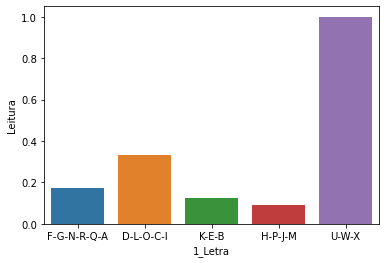

In [52]:
sns.barplot(x='1_Letra',y='Leitura', data=df, ci=False)

## 4.2 Variável ‘5_Dígito’

In [53]:
#CONTAGEM '5_Dígito'
df['5_Dígito'].value_counts().sort_index(ascending=True).to_frame()

,5_Dígito
0,51
1,75
2,66
3,79
4,65
5,54
6,60
7,79
8,68
9,62


<AxesSubplot:xlabel='5_Dígito', ylabel='count'>

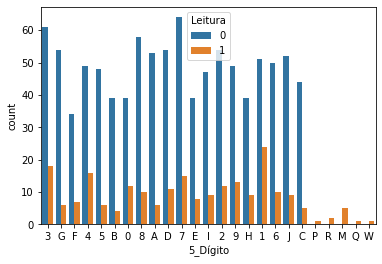

In [54]:
sns.countplot(x='5_Dígito',data=df, hue = 'Leitura')

In [55]:
#Separando a variável '5_Dígito' conforme o tipo de placas: padrão antigo e padrão Mercosul
df_antigo = df[(df['5_Dígito'].str.isnumeric())]

In [56]:
df_mercosul = df[(df['5_Dígito'].str.isalpha())]

In [57]:
#Percentual de Falsos Positivos para o padrão antigo
df_antigo['Leitura'].value_counts(normalize=True).round(4).to_frame()*100

,Leitura
0,79.36
1,20.64


In [58]:
#Percentual de Falsos Positivos para o padrão Mercosul
df_mercosul['Leitura'].value_counts(normalize=True).round(4).to_frame()*100

,Leitura
0,84.42
1,15.58


In [59]:
#Adicionando a variável 'Mercosul' ao dataset - True para padrão Mercosul, False para padrão antigo
df['Mercosul'] = (df['5_Dígito'].str.isalpha())

In [60]:
df[['Mercosul','5_Dígito']].head(5)

,Mercosul,5_Dígito
0,False,3
1,True,G
2,True,G
3,False,3
4,True,F


### 4.2.1 Variável ‘5_Dígito’ – Padrão antigo de placas

In [61]:
#Contagem de placas do padrão antigo
df_antigo['5_Dígito'].agg(['nunique','count','size'])

nunique     10
count      659
size       659
Name: 5_Dígito, dtype: int64

In [62]:
#Contagem por dígito
df_antigo['5_Dígito'].value_counts().sort_index(ascending=True).to_frame()

,5_Dígito
0,51
1,75
2,66
3,79
4,65
5,54
6,60
7,79
8,68
9,62


In [63]:
#Frequência por dígito
df_antigo['5_Dígito'].value_counts(normalize=True).sort_index(ascending=True).to_frame()

,5_Dígito
0,0.077390
1,0.113809
2,0.100152
3,0.119879
4,0.098634
5,0.081942
6,0.091047
7,0.119879
8,0.103187
9,0.094082


In [64]:
#CONTAGEM DE LEITURAS INCORRETAS, SEPARADOS POR '5_Dígito' - Padrão Antigo
df_antigo.groupby(['5_Dígito','Leitura']).size().to_frame()

0
5_Dígito Leitura    
0        0        39
         1        12
1        0        51
         1        24
2        0        54
         1        12
3        0        61
         1        18
4        0        49
         1        16
5        0        48
         1         6
6        0        50
         1        10
7        0        64
         1        15
8        0        58
         1        10
9        0        49
         1        13

In [65]:
#PERCENTUAL DE FALSOS POSITIVOS, SEPARADOS POR '5_Dígito'
df_percentual_ant = df_antigo.groupby(['5_Dígito','Leitura']).agg({'MUNICIPIO':'count'})[['MUNICIPIO']]
df_percentual_ant['%'] = df_percentual_ant.groupby(level=0).apply(lambda x: 100*x/x.sum())
df_percentual_ant = df_percentual_ant.rename(columns={'MUNICIPIO':'Quantidade'}).round(2)
df_percentual_ant

Quantidade      %
5_Dígito Leitura                   
0        0                39  76.47
         1                12  23.53
1        0                51  68.00
         1                24  32.00
2        0                54  81.82
         1                12  18.18
3        0                61  77.22
         1                18  22.78
4        0                49  75.38
         1                16  24.62
5        0                48  88.89
         1                 6  11.11
6        0                50  83.33
         1                10  16.67
7        0                64  81.01
         1                15  18.99
8        0                58  85.29
         1                10  14.71
9        0                49  79.03
         1                13  20.97

In [66]:
df_percentual_ant = df_percentual_ant.reset_index()

In [67]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de quantidade
df_falso_positivo_ant = df_percentual_ant[df_percentual_ant['Leitura']==1].sort_values(by = 'Quantidade', ascending = False)
df_falso_positivo_ant.head(10)

,5_Dígito,Leitura,Quantidade,%
3,1,1,24,32.00
7,3,1,18,22.78
9,4,1,16,24.62
15,7,1,15,18.99
19,9,1,13,20.97
1,0,1,12,23.53
5,2,1,12,18.18
13,6,1,10,16.67
17,8,1,10,14.71
11,5,1,6,11.11


In [68]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de percentual
df_falso_positivo_ant.sort_values(by = '%', ascending = False)

,5_Dígito,Leitura,Quantidade,%
3,1,1,24,32.00
9,4,1,16,24.62
1,0,1,12,23.53
7,3,1,18,22.78
19,9,1,13,20.97
15,7,1,15,18.99
5,2,1,12,18.18
13,6,1,10,16.67
17,8,1,10,14.71
11,5,1,6,11.11


<AxesSubplot:xlabel='5_Dígito', ylabel='Leitura'>

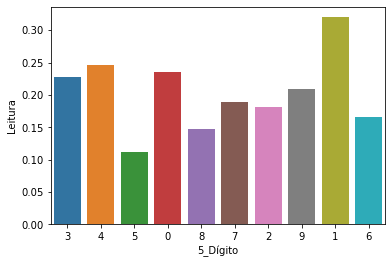

In [69]:
sns.barplot(x='5_Dígito',y='Leitura', data=df_antigo, ci=False)

<AxesSubplot:xlabel='5_Dígito', ylabel='count'>

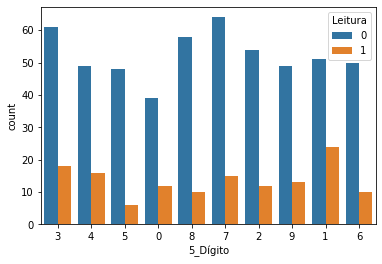

In [70]:
sns.countplot(x='5_Dígito',data=df_antigo, hue = 'Leitura')

### 4.2.2 Variável ‘5_Dígito’ – Padrão Mercosul

In [71]:
#Contagem de placas do padrão Mercosul
df_mercosul['5_Dígito'].agg(['nunique','count','size'])

nunique     15
count      539
size       539
Name: 5_Dígito, dtype: int64

In [72]:
#Contagem por dígito
df_mercosul['5_Dígito'].value_counts().sort_index(ascending=True).to_frame()

,5_Dígito
A,59
B,43
C,49
D,65
E,47
F,41
G,60
H,48
I,56
J,61


In [73]:
#Frequência por dígito
df_mercosul['5_Dígito'].value_counts(normalize=True).sort_index(ascending=True).round(4).to_frame()*100

,5_Dígito
A,10.95
B,7.98
C,9.09
D,12.06
E,8.72
F,7.61
G,11.13
H,8.91
I,10.39
J,11.32


In [74]:
#CONTAGEM DE FALSOS POSITIVOS, SEPARADOS POR '5_Dígito' - Padrão Mercosul
df_mercosul.groupby(['5_Dígito','Leitura']).size().to_frame()

0
5_Dígito Leitura    
A        0        53
         1         6
B        0        39
         1         4
C        0        44
         1         5
D        0        54
         1        11
E        0        39
         1         8
F        0        34
         1         7
G        0        54
         1         6
H        0        39
         1         9
I        0        47
         1         9
J        0        52
         1         9
M        1         5
P        1         1
Q        1         1
R        1         2
W        1         1

In [75]:
#PERCENTUAL DE FALSOS POSITIVOS, SEPARADOS POR '5_Dígito'
df_percentual_merc = df_mercosul.groupby(['5_Dígito','Leitura']).agg({'MUNICIPIO':'count'})[['MUNICIPIO']]
df_percentual_merc['%'] = df_percentual_merc.groupby(level=0).apply(lambda x: 100*x/x.sum())
df_percentual_merc = df_percentual_merc.rename(columns={'MUNICIPIO':'Quantidade'}).round(2)
df_percentual_merc

Quantidade       %
5_Dígito Leitura                    
A        0                53   89.83
         1                 6   10.17
B        0                39   90.70
         1                 4    9.30
C        0                44   89.80
         1                 5   10.20
D        0                54   83.08
         1                11   16.92
E        0                39   82.98
         1                 8   17.02
F        0                34   82.93
         1                 7   17.07
G        0                54   90.00
         1                 6   10.00
H        0                39   81.25
         1                 9   18.75
I        0                47   83.93
         1                 9   16.07
J        0                52   85.25
         1                 9   14.75
M        1                 5  100.00
P        1                 1  100.00
Q        1                 1  100.00
R        1                 2  100.00
W        1                 1  100.00

In [76]:
df_percentual_merc = df_percentual_merc.reset_index()

In [77]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de quantidade
df_falso_positivo_merc = df_percentual_merc[df_percentual_merc['Leitura']==1].sort_values(by = 'Quantidade', ascending = False)
df_falso_positivo_merc.head(30)

,5_Dígito,Leitura,Quantidade,%
7,D,1,11,16.92
15,H,1,9,18.75
17,I,1,9,16.07
19,J,1,9,14.75
9,E,1,8,17.02
11,F,1,7,17.07
1,A,1,6,10.17
13,G,1,6,10.00
5,C,1,5,10.20
20,M,1,5,100.00


In [78]:
# Quadro comparativo de falsos positivos, classificado em ordem decrescente de percentual
df_falso_positivo_merc.sort_values(by = '%', ascending = False)

,5_Dígito,Leitura,Quantidade,%
20,M,1,5,100.00
23,R,1,2,100.00
21,P,1,1,100.00
22,Q,1,1,100.00
24,W,1,1,100.00
15,H,1,9,18.75
11,F,1,7,17.07
9,E,1,8,17.02
7,D,1,11,16.92
17,I,1,9,16.07


In [79]:
#Agrupando as letras M, R, P, Q e W em 'M-R-P-Q-W'
df.loc[df['5_Dígito'] == 'M', '5_Dígito'] = 'M-R-P-Q-W'
df.loc[df['5_Dígito'] == 'R', '5_Dígito'] = 'M-R-P-Q-W'
df.loc[df['5_Dígito'] == 'P', '5_Dígito'] = 'M-R-P-Q-W'
df.loc[df['5_Dígito'] == 'Q', '5_Dígito'] = 'M-R-P-Q-W'
df.loc[df['5_Dígito'] == 'W', '5_Dígito'] = 'M-R-P-Q-W'

In [80]:
#Agrupando as letras H, F, E, D, I  J em ' H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'H', '5_Dígito'] = 'H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'F', '5_Dígito'] = 'H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'E', '5_Dígito'] = 'H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'D', '5_Dígito'] = 'H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'I', '5_Dígito'] = 'H-F-E-D-I-J'
df.loc[df['5_Dígito'] == 'J', '5_Dígito'] = 'H-F-E-D-I-J'

In [81]:
#Agrupando as letras C, A, G e B em 'C-A-G-B'
df.loc[df['5_Dígito'] == 'C', '5_Dígito'] = 'C-A-G-B'
df.loc[df['5_Dígito'] == 'A', '5_Dígito'] = 'C-A-G-B'
df.loc[df['5_Dígito'] == 'G', '5_Dígito'] = 'C-A-G-B'
df.loc[df['5_Dígito'] == 'B', '5_Dígito'] = 'C-A-G-B'

In [82]:
#Agrupando os números 4, 0, 3 e 9 em '4-0-3-9'
df.loc[df['5_Dígito'] == '4', '5_Dígito'] = '4-0-3-9'
df.loc[df['5_Dígito'] == '0', '5_Dígito'] = '4-0-3-9'
df.loc[df['5_Dígito'] == '3', '5_Dígito'] = '4-0-3-9'
df.loc[df['5_Dígito'] == '9', '5_Dígito'] = '4-0-3-9'

In [83]:
#Agrupando os números 7, 2, 6 e 8 em '7-2-6-8'
df.loc[df['5_Dígito'] == '7', '5_Dígito'] = '7-2-6-8'
df.loc[df['5_Dígito'] == '2', '5_Dígito'] = '7-2-6-8'
df.loc[df['5_Dígito'] == '6', '5_Dígito'] = '7-2-6-8'
df.loc[df['5_Dígito'] == '8', '5_Dígito'] = '7-2-6-8'

<AxesSubplot:xlabel='5_Dígito', ylabel='count'>

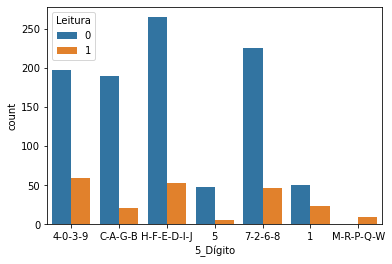

In [84]:
#Contagem de valores de '5_Dígito' - Após agrupamento
sns.countplot(x='5_Dígito',data=df, hue = 'Leitura')

## 4.3 Variável ‘Conf’

In [85]:
#Análise inicial
df['Conf'].describe().to_frame()

,Conf
count,1198.000000
mean,87.225376
std,8.529136
min,65.000000
25%,82.000000
50%,89.000000
75%,94.000000
max,99.000000


<AxesSubplot:xlabel='Conf', ylabel='Count'>

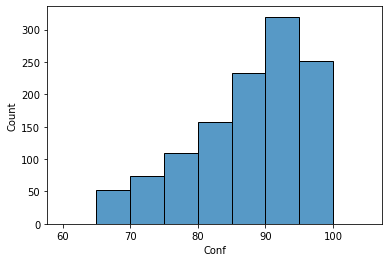

In [86]:
#Histograma da variável 'Conf'
sns.histplot(data=df['Conf'],bins=range(60,110,5))

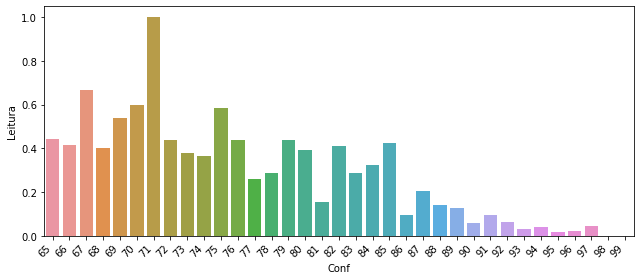

In [87]:
#Frequência relativa de Leituras Incorretas por 'Conf'
plt.figure(figsize=(9,4))
conf_FP = sns.barplot(x = 'Conf', y = 'Leitura', data = df, ci=False)
conf_FP.set_xticklabels(conf_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(conf_FP)

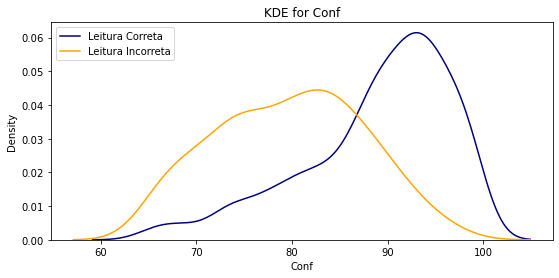

In [88]:
#Adaptado de https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Leitura'] == False][feature], color= 'navy')
    ax1 = sns.kdeplot(df[df['Leitura'] == True][feature], color= 'orange')
    plt.gca().legend(('Leitura Correta','Leitura Incorreta'))
kdeplot('Conf')

In [89]:
#Normalizando variável 'Conf' - Método Min-Max
df['Conf'] = (df['Conf'] - df['Conf'].min()) / (df['Conf'].max() - df['Conf'].min())

In [90]:
#Describe() variável 'Conf' - Após normalização
df['Conf'].round(4).describe()

count    1198.000000
mean        0.653688
std         0.250860
min         0.000000
25%         0.500000
50%         0.705900
75%         0.852900
max         1.000000
Name: Conf, dtype: float64

## 4.4 Variável ‘MUNICIPO’ e ‘UF’

In [91]:
#Municípios únicos no dataset
df['MUNICIPIO'].nunique()

354

In [92]:
#Municípios mais comuns
df['MUNICIPIO'].value_counts().head(18)

GUAIRA                     191
UMUARAMA                    44
MUNDO NOVO                  43
MARECHAL CANDIDO RONDON     36
CURITIBA                    30
CASCAVEL                    30
SEM REGISTRO RENAVAM        29
TOLEDO                      26
PALOTINA                    25
TERRA ROXA                  21
MARINGA                     21
BELO HORIZONTE              18
SAO PAULO                   17
DOURADOS                    16
NAVIRAI                     14
ELDORADO                    12
MERCEDES                    12
CAMPO GRANDE                11
Name: MUNICIPIO, dtype: int64

In [93]:
#Extraindo a informação 'SEM REGISTRO RENAVAM' para uma nova coluna chamada 'SemRenavam'
df['SemRenavam'] = df['MUNICIPIO']

In [94]:
#Atribuindo valor True para variável 'SemRenavam' quando 'MUNICIPIO' = 'SEM REGISTRO RENAVAM'
df.loc[df['MUNICIPIO'] == 'SEM REGISTRO RENAVAM', 'SemRenavam'] = True

In [95]:
#Atribuindo valor False para variável 'SemRenavam' quando 'MUNICIPIO' != 'SEM REGISTRO RENAVAM'
df.loc[df['MUNICIPIO'] != 'SEM REGISTRO RENAVAM', 'SemRenavam'] = False

In [96]:
#Verificando a nova feature 'SemRenavam'
df['SemRenavam'].iloc[40:45]

40    False
41    False
42    False
43    False
44     True
Name: SemRenavam, dtype: object

In [97]:
#Eliminando coluna 'MUNICIPIO'
df.drop(['MUNICIPIO'], axis=1, inplace=True)

In [98]:
#UFs únicas no dataset
df['UF'].nunique()

21

In [99]:
#UF's mais comuns
df['UF'].value_counts().head(25)

PR    692
MS    157
SC     81
SP     63
RS     51
MT     44
MG     34
SR     29
RJ      9
GO      8
ES      6
RO      5
CE      4
PE      3
PI      3
AC      3
BA      2
PA      1
SE      1
DF      1
RR      1
Name: UF, dtype: int64

<AxesSubplot:xlabel='UF', ylabel='Leitura'>

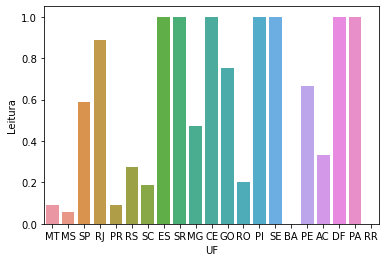

In [100]:
#Frequência relativa de Leituras Incorretas por 'UF'
sns.barplot(x = 'UF', y = 'Leitura', data = df, ci=False)

In [101]:
#Agrupando as UF's MT, MS, PR em 'MT-MS-PR'
df.loc[df['UF'] == 'MT', 'UF'] = 'MT-MS-PR'
df.loc[df['UF'] == 'MS', 'UF'] = 'MT-MS-PR'
df.loc[df['UF'] == 'PR', 'UF'] = 'MT-MS-PR'

In [102]:
#Agrupando as UF's SC, RS, RO, AC em 'SC-RS-RO-AC'
df.loc[df['UF'] == 'SC', 'UF'] = 'SC-RS-RO-AC'
df.loc[df['UF'] == 'RS', 'UF'] = 'SC-RS-RO-AC'
df.loc[df['UF'] == 'RO', 'UF'] = 'SC-RS-RO-AC'
df.loc[df['UF'] == 'AC', 'UF'] = 'SC-RS-RO-AC'

In [103]:
#Agrupando as UF's SP, RJ, MG, GO, PE em 'SP-RJ-MG-GO-PE'
df.loc[df['UF'] == 'SP', 'UF'] = 'SP-RJ-MG-GO-PE'
df.loc[df['UF'] == 'RJ', 'UF'] = 'SP-RJ-MG-GO-PE'
df.loc[df['UF'] == 'MG', 'UF'] = 'SP-RJ-MG-GO-PE'
df.loc[df['UF'] == 'GO', 'UF'] = 'SP-RJ-MG-GO-PE'
df.loc[df['UF'] == 'PE', 'UF'] = 'SP-RJ-MG-GO-PE'

In [104]:
#Agrupando as UF's ES, CE, PI, SE, DF, PA em 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'ES', 'UF'] = 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'CE', 'UF'] = 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'PI', 'UF'] = 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'SE', 'UF'] = 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'DF', 'UF'] = 'ES-CE-PI-SE-DF-PA'
df.loc[df['UF'] == 'PA', 'UF'] = 'ES-CE-PI-SE-DF-PA'

In [105]:
#Agrupando as UF's BA E RR em 'BA-RR'
df.loc[df['UF'] == 'BA', 'UF'] = 'BA-RR'
df.loc[df['UF'] == 'RR', 'UF'] = 'BA-RR'

In [106]:
#UFs únicas no dataset - Após agrupamento
df['UF'].nunique()

6

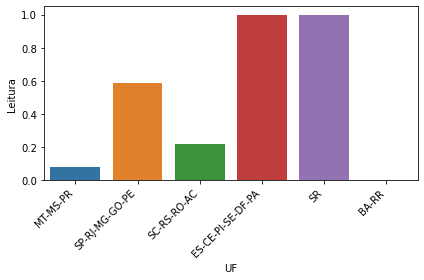

In [107]:
#Frequência relativa de leituras incorretas por 'UF' - Após agrupamento
UF_FP = sns.barplot(x = 'UF', y = 'Leitura', data = df, ci=False)
UF_FP.set_xticklabels(UF_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()

## 4.5 Variáveis ‘MARCA/MODELO’ e ‘TIPO-VEICULO’

In [108]:
#Contagemn de valores únicos para ‘MARCA/MODELO’
df['MARCA/MODELO'].nunique()

683

In [109]:
#Variável de alta cardinalidade - Eliminando do dataset
df.drop(['MARCA/MODELO'], axis=1, inplace=True)

In [110]:
#Contagemn de valores únicos para ‘TIPO-VEICULO’
df['TIPO-VEICULO'].nunique()

13

In [111]:
#Contagem de valores para ‘TIPO-VEICULO’
df['TIPO-VEICULO'].value_counts().head(15)

AUTOMOVEL    551
CNETE        208
S.REBOQUE    133
C. TRATOR     77
CAMIONETA     59
CAMINHAO      51
MOTOCICLO     36
UTILITáRI     31
miss          29
REBOQUE       10
ONIBUS         6
MOTONETA       5
MICROONIB      2
Name: TIPO-VEICULO, dtype: int64

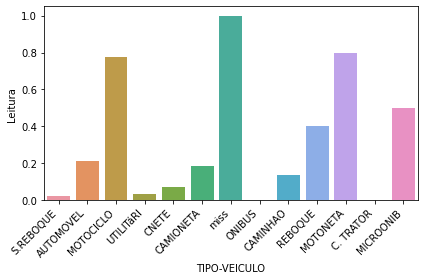

In [112]:
#Frequência relativa de leituras incorretas por 'Conf'
plt.figure(figsize=(6,4))
tipo_veiculo_FP = sns.barplot(x = 'TIPO-VEICULO', y = 'Leitura', data = df, ci=False)
tipo_veiculo_FP.set_xticklabels(tipo_veiculo_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(tipo_veiculo_FP)

In [113]:
#Agrupando ‘AUTOMÓVEL’ e ‘CAMIONETA’ em ‘AUTO-CNETA’
df.loc[df['TIPO-VEICULO'] == 'AUTOMÓVEL', 'TIPO-VEICULO'] = 'AUTO-CNETA'
df.loc[df['TIPO-VEICULO'] == 'CAMIONETA', 'TIPO-VEICULO'] = 'AUTO-CNETA'

In [114]:
#Agrupando ‘MOTOCICLO’ e ‘MOTONETA’, em ‘MOTO’
df.loc[df['TIPO-VEICULO'] == 'MOTOCICLO', 'TIPO-VEICULO'] = 'MOTO'
df.loc[df['TIPO-VEICULO'] == 'MOTONETA', 'TIPO-VEICULO'] = 'MOTO'

In [115]:
#Agrupando ‘CNETE’ e ‘UTILITaRI’, em ‘CARGA-LEVE’
df.loc[df['TIPO-VEICULO'] == 'CNETE', 'TIPO-VEICULO'] = 'CARGA-LEVE'
df.loc[df['TIPO-VEICULO'] == 'UTILITáRI', 'TIPO-VEICULO'] = 'CARGA-LEVE'

In [116]:
#Agrupando ‘ONIBUS’ e ‘MICROONIB’, em ‘BUS’
df.loc[df['TIPO-VEICULO'] == 'ONIBUS', 'TIPO-VEICULO'] = 'BUS'
df.loc[df['TIPO-VEICULO'] == 'MICROONIB', 'TIPO-VEICULO'] = 'BUS'

In [117]:
#Agrupando ‘C. TRATOR’ e ‘S.REBOQUE’, em 'CARGA-PESADA’
df.loc[df['TIPO-VEICULO'] == 'C. TRATOR', 'TIPO-VEICULO'] = 'CARGA-PESADA'
df.loc[df['TIPO-VEICULO'] == 'S.REBOQUE', 'TIPO-VEICULO'] = 'CARGA-PESADA'

In [118]:
#Contagemn de valores únicos para ‘TIPO-VEICULO’ - Depois do Agrupamento
df['TIPO-VEICULO'].nunique()

9

In [119]:
#Contagem de valores para ‘TIPO-VEICULO’ - Depois do Agrupamento
df['TIPO-VEICULO'].value_counts().head(15)

AUTOMOVEL       551
CARGA-LEVE      239
CARGA-PESADA    210
AUTO-CNETA       59
CAMINHAO         51
MOTO             41
miss             29
REBOQUE          10
BUS               8
Name: TIPO-VEICULO, dtype: int64

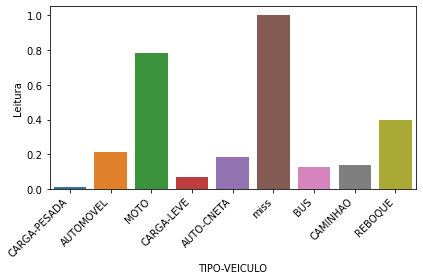

In [120]:
#Frequência relativa de leituras incorretas por 'TIPO-VEICULO' - Depois do Agrupamento
plt.figure(figsize=(6,4))
tipo_veiculo_FP = sns.barplot(x = 'TIPO-VEICULO', y = 'Leitura', data = df, ci=False)
tipo_veiculo_FP.set_xticklabels(tipo_veiculo_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(tipo_veiculo_FP)

# 4.6 Variável ‘COR’

In [121]:
#Contagem de valores únicos
df['COR'].nunique()

13

In [122]:
#Contagem de valores
df['COR'].value_counts()

BRANCA      414
PRATA       289
PRETA       187
CINZA       113
VERMELHA     84
AZUL         43
miss         29
VERDE        18
BEGE         10
AMARELA       7
LARANJA       2
MARROM        1
ROXA          1
Name: COR, dtype: int64

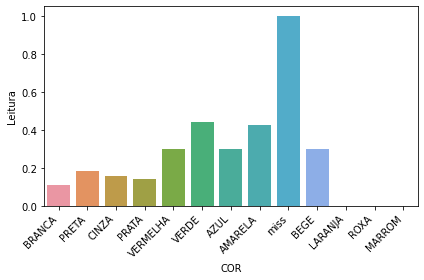

In [123]:
#Frequência relativa de leituras incorretas por 'COR'
plt.figure(figsize=(6,4))
cor_FP = sns.barplot(x = 'COR', y = 'Leitura', data = df, ci=False)
cor_FP.set_xticklabels(cor_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(cor_FP)

In [124]:
#Agrupando as cores branca, preta, cinza e prata em 'BRA-PRE-CIN-PRA'
df.loc[df['COR'] == 'BRANCA', 'COR'] = 'BRA-PRE-CIN-PRA'
df.loc[df['COR'] == 'PRETA', 'COR'] = 'BRA-PRE-CIN-PRA'
df.loc[df['COR'] == 'CINZA', 'COR'] = 'BRA-PRE-CIN-PRA'
df.loc[df['COR'] == 'PRATA', 'COR'] = 'BRA-PRE-CIN-PRA'

In [125]:
#Agrupando as cores vermelha, verde, azul, amarela e bege  em 'VERM-VERD-AZ-AM-BEG'
df.loc[df['COR'] == 'VERMELHA', 'COR'] = 'VERM-VERD-AZ-AM-BEG'
df.loc[df['COR'] == 'VERDE', 'COR'] = 'VERM-VERD-AZ-AM-BEG'
df.loc[df['COR'] == 'AZUL', 'COR'] = 'VERM-VERD-AZ-AM-BEG'
df.loc[df['COR'] == 'AMARELA', 'COR'] = 'VERM-VERD-AZ-AM-BEG'
df.loc[df['COR'] == 'BEGE', 'COR'] = 'VERM-VERD-AZ-AM-BEG'

In [126]:
#Agrupando as cores laranja, roxa e marrom em 'LAR-ROX-MARR'
df.loc[df['COR'] == 'LARANJA', 'COR'] = 'LAR-ROX-MARR'
df.loc[df['COR'] == 'ROXA', 'COR'] = 'LAR-ROX-MARR'
df.loc[df['COR'] == 'MARROM', 'COR'] = 'LAR-ROX-MARR'

In [127]:
#Contagem de valores únicos - Depois do Agrupamento
df['COR'].nunique()

4

In [128]:
#Contagem de valores - Depois do Agrupamento
df['COR'].value_counts()

BRA-PRE-CIN-PRA        1003
VERM-VERD-AZ-AM-BEG     162
miss                     29
LAR-ROX-MARR              4
Name: COR, dtype: int64

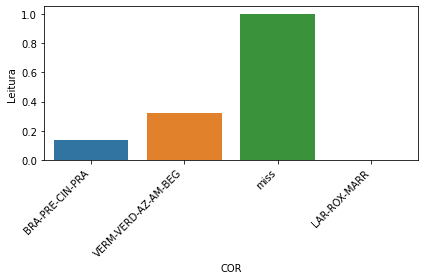

In [129]:
#Frequência relativa de leituras incorretas por 'COR' - Depois do Agrupamento
plt.figure(figsize=(6,4))
cor_FP = sns.barplot(x = 'COR', y = 'Leitura', data = df, ci=False)
cor_FP.set_xticklabels(cor_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(cor_FP)

## 4.7 Variável ‘ANO-FABRICAÇAO’

In [130]:
df['ANO-FABRICACAO'].describe

<bound method NDFrame.describe of 0       2010.0
1       2005.0
2       2007.0
3       2009.0
4       2020.0
         ...  
1195    2018.0
1196    2010.0
1197    2010.0
1198    1998.0
1199    2020.0
Name: ANO-FABRICACAO, Length: 1198, dtype: float64>

In [131]:
df['ANO-FABRICACAO'].nunique()

48

In [132]:
df[(df['ANO-FABRICACAO']<2000)].agg(['count'])

,PlacaHash,1_Letra,5_Dígito,Leitura,Conf,UF,TIPO-VEICULO,COR,ANO-FABRICACAO,ULT-ATUALIZACAO,SITUACAO,RESTRICOES,Hora,Mercosul,SemRenavam
count,138,138,138,138,138,138,138,138,138,109,109,109,138,138,138


<AxesSubplot:xlabel='ANO-FABRICACAO', ylabel='Count'>

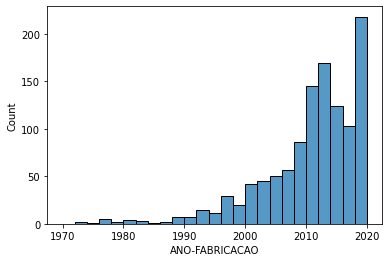

In [133]:
#Histograma
sns.histplot(data=df['ANO-FABRICACAO'],bins=range(1970,2021,2))

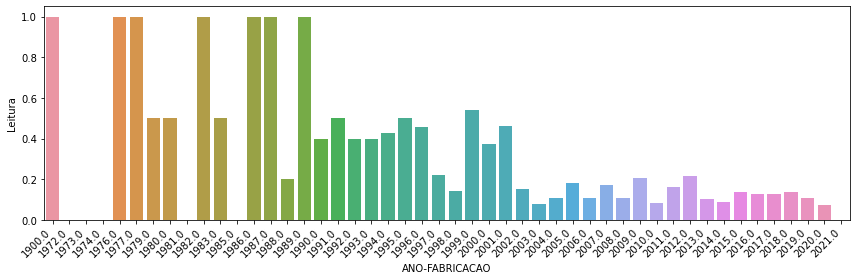

In [134]:
#Frequência relativa de leituras incorretas por 'ANO-FABRICACAO'
plt.figure(figsize=(12,4))
ano_FP = sns.barplot(x = 'ANO-FABRICACAO', y = 'Leitura', data = df, ci=False)
ano_FP.set_xticklabels(ano_FP.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.tight_layout()
plt.show(ano_FP)

## 4.8 Variáveis ‘ULT-ATUALIZACAO’, ‘SITUACAO’ e ‘RESTRICOES'

In [135]:
#Contagem de registros únicos de 'ULT-ATUALIZACAO'
df['ULT-ATUALIZACAO'].nunique()

813

In [136]:
#Contagem de registros da variável 'SITUACAO'
df['SITUACAO'].value_counts()

CIRCULACAO                           1166
BAIXADO                                 1
BAIXADO    DATA TRANSF 01/09/2015       1
BAIXADO    DATA TRANSF 05/08/2013       1
Name: SITUACAO, dtype: int64

In [137]:
#Contagem de registros da variável 'RESTRICOES'
df['RESTRICOES'].value_counts()

   NAO HA                                                                                                                                               605
   ALIENACAO FIDUCIARIA                                                                                                                                 367
   NAO HA|                                             RECALL - TECLE <PF9>                                                                              44
   ALIENACAO FIDUCIARIA|                                             RECALL - TECLE <PF9>                                                                34
   NAO HA|                                      COMUNICACAO DE VENDA - TECLE <PF6>                                                                       23
   ALIENACAO FIDUCIARIA|   RESTRIÇÃO RENAJUD - TECLE <PF5>                                                                                               10
   RESERVA DE DOMINIO                                           

In [138]:
#Eliminando variáveis 'ULT-ATUALIZACAO','SITUACAO' e 'RESTRICOES'
df.drop(['ULT-ATUALIZACAO','SITUACAO','RESTRICOES'], axis=1, inplace=True)

## 4.8 Variável ‘Hora’

In [139]:
#separando leituras da coluna 'Hora' em leituras com luz natural e no período noturno
#Atribuindo o valor True para a coluna 'Hora' até às 18:15hs (até index 591)
df.at[0:591, 'Hora'] = True

In [140]:
#Atribuindo o valor False para a coluna 'Hora' após às 18:15hs (index 592 até o fim)
df.at[592:1199, 'Hora'] = False

In [141]:
#Renomeando coluna 'Hora' para 'Diurno'
df.rename(columns={'Hora': 'Diurno'}, inplace = True)

In [142]:
#Contagem de registros para 'Diurno'
df['Diurno'].value_counts()

False    608
True     590
Name: Diurno, dtype: int64

<AxesSubplot:xlabel='Diurno', ylabel='Leitura'>

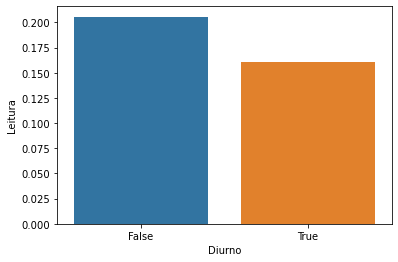

In [143]:
#Frequência relativa de FP's por 'Diurno'
sns.barplot(x = 'Diurno', y = 'Leitura', data = df, ci=False)

# 5. Criação de Modelos de Machine Learning

## 5.1 Variáveis dummies

In [144]:
#Identificando variáveis com até 10 registros distintos para criação de variáveis 'dummy'
df.nunique()

PlacaHash         1198
1_Letra              5
5_Dígito             7
Leitura              2
Conf                35
UF                   6
TIPO-VEICULO         9
COR                  4
ANO-FABRICACAO      48
Diurno               2
Mercosul             2
SemRenavam           2
dtype: int64

In [145]:
#Criação de variáveis 'dummy'
dummy_df = pd.get_dummies(df,
                         columns = ['UF',
                                    'TIPO-VEICULO',
                                    'COR',
                                    '1_Letra',
                                    '5_Dígito'
                                   ],
                                    drop_first = True,
                          prefix = ['UF',
                                    'TIPO-VEICULO',
                                    'COR',
                                    '1_Letra',
                                    '5_Dígito'
                                   ],
                          prefix_sep = '_' ) 

In [146]:
#Verificando colunas após criação das variáveis 'dummy'
dummy_df.columns

Index(['PlacaHash', 'Leitura', 'Conf', 'ANO-FABRICACAO', 'Diurno', 'Mercosul',
       'SemRenavam', 'UF_ES-CE-PI-SE-DF-PA', 'UF_MT-MS-PR', 'UF_SC-RS-RO-AC',
       'UF_SP-RJ-MG-GO-PE', 'UF_SR', 'TIPO-VEICULO_AUTOMOVEL',
       'TIPO-VEICULO_BUS', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-LEVE',
       'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_MOTO',
       'TIPO-VEICULO_REBOQUE', 'TIPO-VEICULO_miss', 'COR_LAR-ROX-MARR',
       'COR_VERM-VERD-AZ-AM-BEG', 'COR_miss', '1_Letra_F-G-N-R-Q-A',
       '1_Letra_H-P-J-M', '1_Letra_K-E-B', '1_Letra_U-W-X', '5_Dígito_4-0-3-9',
       '5_Dígito_5', '5_Dígito_7-2-6-8', '5_Dígito_C-A-G-B',
       '5_Dígito_H-F-E-D-I-J', '5_Dígito_M-R-P-Q-W'],
      dtype='object')

In [147]:
#Verificando tipo das variáveis
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1199
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlacaHash                  1198 non-null   uint64 
 1   Leitura                    1198 non-null   int64  
 2   Conf                       1198 non-null   float64
 3   ANO-FABRICACAO             1198 non-null   float64
 4   Diurno                     1198 non-null   object 
 5   Mercosul                   1198 non-null   bool   
 6   SemRenavam                 1198 non-null   object 
 7   UF_ES-CE-PI-SE-DF-PA       1198 non-null   uint8  
 8   UF_MT-MS-PR                1198 non-null   uint8  
 9   UF_SC-RS-RO-AC             1198 non-null   uint8  
 10  UF_SP-RJ-MG-GO-PE          1198 non-null   uint8  
 11  UF_SR                      1198 non-null   uint8  
 12  TIPO-VEICULO_AUTOMOVEL     1198 non-null   uint8  
 13  TIPO-VEICULO_BUS           1198 non-null   uint8

In [148]:
#Convertendo variáveis para tipo 'int64'
dummy_df[['UF_ES-CE-PI-SE-DF-PA', 'UF_MT-MS-PR', 'UF_SC-RS-RO-AC',
       'UF_SP-RJ-MG-GO-PE', 'UF_SR', 'TIPO-VEICULO_AUTOMOVEL',
       'TIPO-VEICULO_BUS', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-LEVE',
       'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_MOTO',
       'TIPO-VEICULO_REBOQUE', 'TIPO-VEICULO_miss', 'COR_LAR-ROX-MARR',
       'COR_VERM-VERD-AZ-AM-BEG', 'COR_miss', '1_Letra_F-G-N-R-Q-A',
       '1_Letra_H-P-J-M', '1_Letra_K-E-B', '1_Letra_U-W-X', '5_Dígito_4-0-3-9',
       '5_Dígito_5', '5_Dígito_7-2-6-8', '5_Dígito_C-A-G-B',
       '5_Dígito_H-F-E-D-I-J', '5_Dígito_M-R-P-Q-W']] = dummy_df[['UF_ES-CE-PI-SE-DF-PA', 'UF_MT-MS-PR', 'UF_SC-RS-RO-AC',
       'UF_SP-RJ-MG-GO-PE', 'UF_SR', 'TIPO-VEICULO_AUTOMOVEL',
       'TIPO-VEICULO_BUS', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-LEVE',
       'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_MOTO',
       'TIPO-VEICULO_REBOQUE', 'TIPO-VEICULO_miss', 'COR_LAR-ROX-MARR',
       'COR_VERM-VERD-AZ-AM-BEG', 'COR_miss', '1_Letra_F-G-N-R-Q-A',
       '1_Letra_H-P-J-M', '1_Letra_K-E-B', '1_Letra_U-W-X', '5_Dígito_4-0-3-9',
       '5_Dígito_5', '5_Dígito_7-2-6-8', '5_Dígito_C-A-G-B',
       '5_Dígito_H-F-E-D-I-J', '5_Dígito_M-R-P-Q-W']].astype('int64')

In [149]:
#Convertendo variáveis para tipo 'float'
dummy_df[['Conf', 'ANO-FABRICACAO']] = dummy_df[['Conf', 'ANO-FABRICACAO']].astype('float')

In [150]:
#Convertendo variáveis para tipo 'bool'
dummy_df[['Diurno', 'Mercosul','SemRenavam']] = dummy_df[['Diurno', 'Mercosul',
       'SemRenavam']].astype('bool')

In [151]:
dummy_df

,PlacaHash,Leitura,Conf,ANO-FABRICACAO,Diurno,Mercosul,SemRenavam,UF_ES-CE-PI-SE-DF-PA,UF_MT-MS-PR,UF_SC-RS-RO-AC,...,1_Letra_F-G-N-R-Q-A,1_Letra_H-P-J-M,1_Letra_K-E-B,1_Letra_U-W-X,5_Dígito_4-0-3-9,5_Dígito_5,5_Dígito_7-2-6-8,5_Dígito_C-A-G-B,5_Dígito_H-F-E-D-I-J,5_Dígito_M-R-P-Q-W
0,16818951966726593698,0,0.647059,2010.0,True,False,False,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,4578175391450274026,0,0.382353,2005.0,True,True,False,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,7385877233923986733,1,0.500000,2007.0,True,True,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3566830866020661058,1,0.294118,2009.0,True,False,False,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,10185387699721257702,0,0.970588,2020.0,True,True,False,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,17587299226595135787,0,0.676471,2018.0,False,True,False,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1196,5257374306946238258,1,0.500000,2010.0,False,True,False,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1197,4908375302694645005,0,0.294118,2010.0,False,True,False,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1198,9907502954820475496,1,0.441176,1998.0,False,False,False,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [152]:
#Separação da variável alvo
alvo = dummy_df['Leitura']

In [153]:
#Separação das variáveis eplicativas
explicativas = dummy_df.drop(["PlacaHash",'Leitura'], axis=1)

In [154]:
#Convertendo variáveis para tipo 'int'
explicativas[['ANO-FABRICACAO','UF_ES-CE-PI-SE-DF-PA', 'UF_MT-MS-PR', 'UF_SC-RS-RO-AC',
       'UF_SP-RJ-MG-GO-PE', 'UF_SR', 'TIPO-VEICULO_AUTOMOVEL',
       'TIPO-VEICULO_BUS', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-LEVE',
       'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_MOTO',
       'TIPO-VEICULO_REBOQUE', 'TIPO-VEICULO_miss', 'COR_LAR-ROX-MARR',
       'COR_VERM-VERD-AZ-AM-BEG', 'COR_miss', '1_Letra_F-G-N-R-Q-A',
       '1_Letra_H-P-J-M', '1_Letra_K-E-B', '1_Letra_U-W-X', '5_Dígito_4-0-3-9',
       '5_Dígito_5', '5_Dígito_7-2-6-8', '5_Dígito_C-A-G-B',
       '5_Dígito_H-F-E-D-I-J', '5_Dígito_M-R-P-Q-W']] = explicativas[['ANO-FABRICACAO','UF_ES-CE-PI-SE-DF-PA', 'UF_MT-MS-PR', 'UF_SC-RS-RO-AC',
       'UF_SP-RJ-MG-GO-PE', 'UF_SR', 'TIPO-VEICULO_AUTOMOVEL',
       'TIPO-VEICULO_BUS', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-LEVE',
       'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_MOTO',
       'TIPO-VEICULO_REBOQUE', 'TIPO-VEICULO_miss', 'COR_LAR-ROX-MARR',
       'COR_VERM-VERD-AZ-AM-BEG', 'COR_miss', '1_Letra_F-G-N-R-Q-A',
       '1_Letra_H-P-J-M', '1_Letra_K-E-B', '1_Letra_U-W-X', '5_Dígito_4-0-3-9',
       '5_Dígito_5', '5_Dígito_7-2-6-8', '5_Dígito_C-A-G-B',
       '5_Dígito_H-F-E-D-I-J', '5_Dígito_M-R-P-Q-W']].astype('int64')

In [155]:
#Convertendo variáveis para tipo 'float'
explicativas[['Conf']] = explicativas[['Conf']].astype('float')

In [156]:
#Convertendo variáveis para tipo 'bool'
explicativas[['Diurno', 'Mercosul','SemRenavam']] = explicativas[['Diurno', 'Mercosul',
       'SemRenavam']].astype('bool')

In [157]:
explicativas.dtypes

Conf                         float64
ANO-FABRICACAO                 int64
Diurno                          bool
Mercosul                        bool
SemRenavam                      bool
UF_ES-CE-PI-SE-DF-PA           int64
UF_MT-MS-PR                    int64
UF_SC-RS-RO-AC                 int64
UF_SP-RJ-MG-GO-PE              int64
UF_SR                          int64
TIPO-VEICULO_AUTOMOVEL         int64
TIPO-VEICULO_BUS               int64
TIPO-VEICULO_CAMINHAO          int64
TIPO-VEICULO_CARGA-LEVE        int64
TIPO-VEICULO_CARGA-PESADA      int64
TIPO-VEICULO_MOTO              int64
TIPO-VEICULO_REBOQUE           int64
TIPO-VEICULO_miss              int64
COR_LAR-ROX-MARR               int64
COR_VERM-VERD-AZ-AM-BEG        int64
COR_miss                       int64
1_Letra_F-G-N-R-Q-A            int64
1_Letra_H-P-J-M                int64
1_Letra_K-E-B                  int64
1_Letra_U-W-X                  int64
5_Dígito_4-0-3-9               int64
5_Dígito_5                     int64
5

## 5.2 Corrigindo desbalanceamento da variável 'Leitura' (variável alvo)

<AxesSubplot:xlabel='Leitura', ylabel='count'>

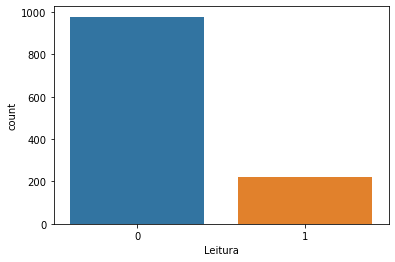

In [158]:
#Contagem de leituras corretas e incorretas
sns.countplot(x=alvo)

In [159]:
#Somatório de leituras corretas
alvo_TP = (alvo == 0).sum()
alvo_TP

978

In [160]:
#Somatório de leituras incorretas
alvo_FP = (alvo == 1).sum()
alvo_FP

220

In [161]:
#oversampling para balancear a variável alvo
from imblearn.over_sampling import *
smote = SMOTE(sampling_strategy='minority',random_state=101)
explicativas_smote, alvo_smote = smote.fit_sample(explicativas, alvo)

In [162]:
#Somatório de leituras corretas, após balanceamento
alvo_smote_TP = (alvo_smote == 0).sum()
alvo_smote_TP

978

In [163]:
#Somatório de leituras incorretas, após balanceamento
alvo_smote_FP = (alvo_smote == 1).sum()
alvo_smote_FP

978

<AxesSubplot:xlabel='Leitura', ylabel='count'>

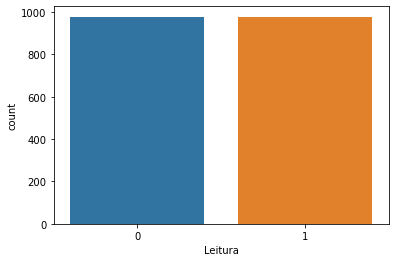

In [164]:
#Contagem de leituras corretas e incorretas, após balanceamento
sns.countplot(x=alvo_smote)

## 5.3 Separação em treino e teste

In [165]:
#Separação das bases de treino e teste
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas_smote,
                                                       alvo_smote,
                                                       test_size=0.3,
                                                       random_state=101)

In [166]:
x_treino

,Conf,ANO-FABRICACAO,Diurno,Mercosul,SemRenavam,UF_ES-CE-PI-SE-DF-PA,UF_MT-MS-PR,UF_SC-RS-RO-AC,UF_SP-RJ-MG-GO-PE,UF_SR,...,1_Letra_F-G-N-R-Q-A,1_Letra_H-P-J-M,1_Letra_K-E-B,1_Letra_U-W-X,5_Dígito_4-0-3-9,5_Dígito_5,5_Dígito_7-2-6-8,5_Dígito_C-A-G-B,5_Dígito_H-F-E-D-I-J,5_Dígito_M-R-P-Q-W
298,0.941176,2013,True,False,False,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
574,0.382353,2012,True,False,False,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1229,0.411162,2003,True,False,False,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1656,0.595287,1993,True,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1622,0.163639,2018,True,False,False,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.406123,2013,False,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1862,0.247645,2005,True,True,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1361,0.764598,2010,True,False,False,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1547,0.329080,2006,True,True,False,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 5.4 Processo de seleção das variáveis

### 5.4.1 Método chi-quadrado
Método do tipo 'Filtro'

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [168]:
#Seleção das 5 variáveis mais relevantes
chi_selector = SelectKBest(chi2,k=5)
chi_selector

SelectKBest(k=5, score_func=<function chi2 at 0x00000206BD3B83A0>)

In [169]:
chi_selector.fit(x_treino,y_treino)

SelectKBest(k=5, score_func=<function chi2 at 0x00000206BD3B83A0>)

In [170]:
chi_support  = chi_selector.get_support()
chi_feature = x_treino.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), ' foram as variaveis selecionadas:')
print(chi_feature)

5  foram as variaveis selecionadas:
['UF_MT-MS-PR', 'TIPO-VEICULO_CARGA-LEVE', 'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_miss', 'COR_miss']


### 5.4.2 Recursive Feature Elimination - RFE
Método do tipo 'Wrapped'

In [171]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
rfe_selector = RFE(estimator=LogisticRegression(random_state=101, max_iter=5000),
                  step=10, n_features_to_select=5)
rfe_selector.fit(x_treino, y_treino)
rfe_support = rfe_selector.get_support()
rfe_feature = x_treino.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), ' foram as variaveis selecionadas:')
print(rfe_feature)

5  foram as variaveis selecionadas:
['Conf', 'UF_MT-MS-PR', 'TIPO-VEICULO_CAMINHAO', 'TIPO-VEICULO_CARGA-PESADA', '5_Dígito_C-A-G-B']


### 5.4.3 Método Embedded (embarcado)
Este método usa RandomForest para selecionar as variáveis

In [172]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
emb_selector = SelectFromModel(RandomForestClassifier(random_state=101))
emb_selector.fit(x_treino, y_treino)
emb_support = emb_selector.get_support()
emb_feature = x_treino.loc[:,emb_support].columns.tolist()
print(str(len(emb_feature)), ' Foram as variaveis selecionadas:')
print(emb_feature)

5  Foram as variaveis selecionadas:
['Conf', 'ANO-FABRICACAO', 'UF_MT-MS-PR', 'TIPO-VEICULO_CARGA-LEVE', 'TIPO-VEICULO_CARGA-PESADA']


### 5.4.4 Voting das variáveis selecionadas

In [173]:
feature_selection_df = pd.DataFrame({'Variáveis': explicativas_smote.columns, #  cria coluna "Variaveis' com conteúdo igual nome das colunas
                                    'Chi-2':chi_support, #cria coluna 'Chi-2' (qui-quadrado) com array (True significa variavel foi selecionada)
                                    'RFE': rfe_support,
                                    'RandomForest':emb_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1) # cria coluna 'Total' com somatório dos valores True.
                                                            # axis = 1 significa que está somando valores das colunas.
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],
                                                       ascending=False)
feature_selection_df

,Variáveis,Chi-2,RFE,RandomForest,Total
6,UF_MT-MS-PR,True,True,True,3
14,TIPO-VEICULO_CARGA-PESADA,True,True,True,3
13,TIPO-VEICULO_CARGA-LEVE,True,False,True,2
0,Conf,False,True,True,2
17,TIPO-VEICULO_miss,True,False,False,1
12,TIPO-VEICULO_CAMINHAO,False,True,False,1
20,COR_miss,True,False,False,1
1,ANO-FABRICACAO,False,False,True,1
28,5_Dígito_C-A-G-B,False,True,False,1
9,UF_SR,False,False,False,0


### 5.4.5 Dataset com as variáveis selecionadas
Selecionadas as variáveis com pelo menos um voto

In [174]:
x_treino_voted = x_treino[['UF_MT-MS-PR', 'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_CARGA-LEVE', 'Conf',
                           'TIPO-VEICULO_miss', 'TIPO-VEICULO_CAMINHAO', 'COR_miss', 'ANO-FABRICACAO', '5_Dígito_C-A-G-B']]
x_teste_voted = x_teste[['UF_MT-MS-PR', 'TIPO-VEICULO_CARGA-PESADA', 'TIPO-VEICULO_CARGA-LEVE', 'Conf',
                           'TIPO-VEICULO_miss', 'TIPO-VEICULO_CAMINHAO', 'COR_miss', 'ANO-FABRICACAO', '5_Dígito_C-A-G-B']]

In [175]:
x_treino_voted.head()

,UF_MT-MS-PR,TIPO-VEICULO_CARGA-PESADA,TIPO-VEICULO_CARGA-LEVE,Conf,TIPO-VEICULO_miss,TIPO-VEICULO_CAMINHAO,COR_miss,ANO-FABRICACAO,5_Dígito_C-A-G-B
298,0,1,0,0.941176,0,0,0,2013,0
574,1,0,0,0.382353,0,0,0,2012,0
1229,1,0,0,0.411162,0,0,0,2003,0
1656,0,0,0,0.595287,0,0,0,1993,0
1622,1,0,1,0.163639,0,0,0,2018,0


In [176]:
x_teste_voted.head()

,UF_MT-MS-PR,TIPO-VEICULO_CARGA-PESADA,TIPO-VEICULO_CARGA-LEVE,Conf,TIPO-VEICULO_miss,TIPO-VEICULO_CAMINHAO,COR_miss,ANO-FABRICACAO,5_Dígito_C-A-G-B
172,1,0,1,0.823529,0,0,0,2021,0
1808,0,0,0,0.154952,0,0,0,2011,0
379,0,1,0,0.205882,0,0,0,2020,1
321,1,0,0,0.911765,0,0,0,2005,0
122,1,0,1,1.000000,0,0,0,2015,0


In [177]:
#Dataset com as variáveis selecionadas
x_teste_voted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 172 to 704
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UF_MT-MS-PR                587 non-null    int64  
 1   TIPO-VEICULO_CARGA-PESADA  587 non-null    int64  
 2   TIPO-VEICULO_CARGA-LEVE    587 non-null    int64  
 3   Conf                       587 non-null    float64
 4   TIPO-VEICULO_miss          587 non-null    int64  
 5   TIPO-VEICULO_CAMINHAO      587 non-null    int64  
 6   COR_miss                   587 non-null    int64  
 7   ANO-FABRICACAO             587 non-null    int64  
 8   5_Dígito_C-A-G-B           587 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 45.9 KB


## 5.5 Construção de modelos

In [178]:
#Módulo de tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [179]:
#Importação da segunda base de teste - XTESTE2 e YTESTE2
XTESTE2 = pd.read_excel('X_TESTE_VOTED.xlsx')
YTESTE2 = pd.read_excel('Y_TESTE.xlsx')

In [180]:
#Segundo dataset de testes
XTESTE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UF_MT-MS-PR                492 non-null    int64  
 1   TIPO-VEICULO_CARGA-PESADA  492 non-null    int64  
 2   TIPO-VEICULO_CARGA-LEVE    492 non-null    int64  
 3   Conf                       492 non-null    float64
 4   TIPO-VEICULO_miss          492 non-null    int64  
 5   TIPO-VEICULO_CAMINHAO      492 non-null    int64  
 6   COR_miss                   492 non-null    int64  
 7   ANO-FABRICACAO             492 non-null    float64
 8   5_Dígito_C-A-G-B           492 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 34.7 KB


### 5.5.1 Logistic Regression

In [181]:
#Dicionário de hiperparâmetros
lr_dict = {'C': np.logspace(-3,3,7),
           'penalty':['l2'],
           'random_state':[101]}

In [182]:
#Importação do modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101, max_iter=500)

In [183]:
#Criação do grid com GridSearchCV
lr_grid = GridSearchCV(estimator=lr,       # estimador (logistic regression)
                      param_grid=lr_dict,  # dicionário com parâmetros
                      scoring='precision', # métrica de validação (precision)
                      cv=10)

In [184]:
#Treinamento do modelo
lr_grid.fit(x_treino_voted, y_treino)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=500, random_state=101),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'], 'random_state': [101]},
             scoring='precision')

In [185]:
#Melhores parâmetros
lr_grid.best_params_

{'C': 100.0, 'penalty': 'l2', 'random_state': 101}

In [186]:
#Melhor score (precision)
lr_grid.best_score_

0.8734243481974646

In [187]:
#Aplicando modelo na base de teste
predictions_lr = lr_grid.predict(x_teste_voted)

In [188]:
#Classification Report
print(classification_report(y_teste, predictions_lr))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       296
           1       0.90      0.87      0.89       291

    accuracy                           0.89       587
   macro avg       0.89      0.89      0.89       587
weighted avg       0.89      0.89      0.89       587



In [189]:
#Matriz de Confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_lr)

array([[269,  27],
       [ 37, 254]], dtype=int64)

In [190]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_lr_XTESTE2 = lr_grid.predict(XTESTE2)

In [191]:
#Classification Report - XTESTE2
print(classification_report(YTESTE2, predictions_lr_XTESTE2))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       246
           1       0.84      0.90      0.87       246

    accuracy                           0.87       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.87      0.87      0.87       492



In [192]:
#Matriz de Confusão - XTESTE2
confusion_matrix(y_true=YTESTE2, y_pred=predictions_lr_XTESTE2)

array([[204,  42],
       [ 24, 222]], dtype=int64)

### 5.5.2 Decision Tree

In [193]:
#Dicionário de hiperparâmetros
dt_dict = {'criterion':['gini','entropy'],
        'min_samples_leaf':[1,2,3,4,5,10],
        'random_state':[101]}

In [194]:
#Importação do classificador Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)

In [195]:
#Criação do grid com GridSearchCV
dt_grid = GridSearchCV(estimator=dt,        #estimador (Decision Tree)
                      param_grid=dt_dict,   #dicionário de parâmetros
                      scoring='precision',  #métrica de validação (precision)
                      cv=10)

In [196]:
#Treinamento do modelo
dt_grid.fit(x_treino_voted, y_treino)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                         'random_state': [101]},
             scoring='precision')

In [197]:
#Melhores parâmetros
dt_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'random_state': 101}

In [198]:
#Melhor resultado (precision)
dt_grid.best_score_

0.8964415176975257

In [199]:
#Aplicando modelo na base de teste
predictions_dt = dt_grid.predict(x_teste_voted)

In [200]:
#Classification Report
print(classification_report(y_teste,predictions_dt))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       296
           1       0.92      0.83      0.87       291

    accuracy                           0.88       587
   macro avg       0.88      0.88      0.88       587
weighted avg       0.88      0.88      0.88       587



In [201]:
#Matriz de Confusão
confusion_matrix(y_teste,predictions_dt)

array([[275,  21],
       [ 49, 242]], dtype=int64)

In [202]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_dt_XTESTE2 = dt_grid.predict(XTESTE2)

In [203]:
#Classification Report - XTESTE2
print(classification_report(YTESTE2, predictions_dt_XTESTE2))               

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       246
           1       0.86      0.85      0.86       246

    accuracy                           0.86       492
   macro avg       0.86      0.86      0.86       492
weighted avg       0.86      0.86      0.86       492



In [204]:
#Matriz de Confusão - XTESTE2
confusion_matrix(y_true=YTESTE2, y_pred=predictions_dt_XTESTE2)

array([[211,  35],
       [ 36, 210]], dtype=int64)

### 5.5.3 Random Forest

In [205]:
#Construção do dicionário de hiperparâmnetros
rf_dict = {'n_estimators':[50,100,200,300,800,1000],    # número de estimadores
            'criterion':['gini', 'entropy'],            # critérios para controle da qualidade das amostras
            'bootstrap':[False, True],                  # amostragem com e sem reposição
            'random_state': [101]}

In [206]:
#Visualização do dicionário de hiperparâmnetros
rf_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [101]}

In [207]:
#Importação do classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=101)

In [208]:
#Criação do grid utilizando GridSearchCV
rf_grid = GridSearchCV(estimator=rf,       # estimador a ser utilizado (Random Forest)
                      param_grid=rf_dict,  # dicionario com parâmetros
                      scoring='precision', # métrica de validação: precision
                      cv=10)

In [209]:
#Treinamdo modelo Random Forest
rf_grid.fit(x_treino_voted, y_treino)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [101]},
             scoring='precision')

In [210]:
#Melhores parâmetros
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'n_estimators': 50,
 'random_state': 101}

In [211]:
#Melhor score (precision)
rf_grid.best_score_

0.8990965387319985

In [212]:
#Aplicando o modelo sobre a base de teste
predictions_rf = rf_grid.predict(x_teste_voted)

In [213]:
#Classification Report
print(classification_report(y_teste, predictions_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       296
           1       0.92      0.87      0.89       291

    accuracy                           0.90       587
   macro avg       0.90      0.90      0.90       587
weighted avg       0.90      0.90      0.90       587



In [214]:
#Matriz de confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_rf)

array([[273,  23],
       [ 37, 254]], dtype=int64)

In [215]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_rf_XTESTE2 = rf_grid.predict(XTESTE2)

In [216]:
#Classification Report - XTESTE2
print(classification_report(YTESTE2, predictions_rf_XTESTE2))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       246
           1       0.84      0.85      0.84       246

    accuracy                           0.84       492
   macro avg       0.84      0.84      0.84       492
weighted avg       0.84      0.84      0.84       492



In [217]:
#Matriz de Confusão - XTESTE2
confusion_matrix(y_true=YTESTE2, y_pred=predictions_rf_XTESTE2)

array([[205,  41],
       [ 37, 209]], dtype=int64)

### 5.5.4 ADA Boost 

In [218]:
#Construção do dicionário de hiperparâmnetros
ada_dict ={'n_estimators':[50,250,500,750,1000],
            'learning_rate':[0.5,1,1.5],
            'algorithm':['SAMME','SAMME.R'],
            'random_state':[101]}

In [219]:
#Visualizando dicionário de hiperparâmetros
ada_dict

{'n_estimators': [50, 250, 500, 750, 1000],
 'learning_rate': [0.5, 1, 1.5],
 'algorithm': ['SAMME', 'SAMME.R'],
 'random_state': [101]}

In [220]:
#Importação do classificador AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=101)

In [221]:
#Criação do grid utilizando GridSearchCV
ada_grid = GridSearchCV(estimator=ada,       # estimador a ser utilizado (Ada Boost)
                      param_grid=ada_dict,   # dicionario com parâmetros
                      scoring='precision',   # métrica de validação: precision
                      cv=10)

In [222]:
#Treinamdo modelo AdaBoost
ada_grid.fit(x_treino_voted, y_treino)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=101),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [50, 250, 500, 750, 1000],
                         'random_state': [101]},
             scoring='precision')

In [223]:
#Visualizando melhores parâmetros do grid
ada_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.5,
 'n_estimators': 1000,
 'random_state': 101}

In [224]:
#Melhor métrica (precision) do grid (CV=10)
ada_grid.best_score_

0.9208769855701042

In [225]:
#Aplicando modelo na base de teste
predictions_ada = ada_grid.predict(x_teste_voted)

In [226]:
#Classification Report
print(classification_report(y_teste, predictions_ada))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       296
           1       0.94      0.90      0.92       291

    accuracy                           0.92       587
   macro avg       0.92      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587



In [227]:
#Matriz de Confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_ada)

array([[278,  18],
       [ 28, 263]], dtype=int64)

In [228]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_ada_XTESTE2 = ada_grid.predict(XTESTE2)

In [229]:
#Classification Report - XTESTE2
print(classification_report(YTESTE2, predictions_ada_XTESTE2))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       246
           1       0.90      0.95      0.92       246

    accuracy                           0.92       492
   macro avg       0.92      0.92      0.92       492
weighted avg       0.92      0.92      0.92       492



In [230]:
#Matriz de Confusão - XTESTE2
confusion_matrix(y_true=YTESTE2, y_pred=predictions_ada_XTESTE2)

array([[220,  26],
       [ 12, 234]], dtype=int64)

### 5.5.5 Gradient Boosting

In [231]:
#Construção do dicionário de hiperparâmnetros
gb_dict = {'max_depth':[3,5,8,10],
            'max_features':['log2','sqrt'],
            'criterion':['friedman_mse',  'mae'],
            'random_state':[101]}

In [232]:
#Visualização do dicionário de hiperparâmnetros
gb_dict

{'max_depth': [3, 5, 8, 10],
 'max_features': ['log2', 'sqrt'],
 'criterion': ['friedman_mse', 'mae'],
 'random_state': [101]}

In [233]:
#Importação do classificador Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=101)

In [234]:
#Criação do grid utilizando Gradient Boosting
gb_grid = GridSearchCV(estimator=gb,       # estimador a ser utilizado (gradient boost)
                      param_grid=gb_dict,  # dicionario com parametros
                      scoring='precision', # métrica de validação (precision)
                      cv=10)

In [235]:
#Treinando modelo Gradient Boosting
gb_grid.fit(x_treino_voted, y_treino)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'max_depth': [3, 5, 8, 10],
                         'max_features': ['log2', 'sqrt'],
                         'random_state': [101]},
             scoring='precision')

In [236]:
#Melhores parâmetros do GridSearchCV
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'log2',
 'random_state': 101}

In [237]:
#Melhor Score(precision)
gb_grid.best_score_

0.8987330522808985

In [238]:
#Aplicando o modelo na base de teste
predictions_gb = rf_grid.predict(x_teste_voted)

In [239]:
#Classification Report
print(classification_report(y_teste, predictions_gb))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       296
           1       0.92      0.87      0.89       291

    accuracy                           0.90       587
   macro avg       0.90      0.90      0.90       587
weighted avg       0.90      0.90      0.90       587



In [240]:
#Matriz de confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_gb)

array([[273,  23],
       [ 37, 254]], dtype=int64)

In [241]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_gb_XTESTE2 = gb_grid.predict(XTESTE2)

In [242]:
#Classification Report - XTESTE2
print(classification_report(YTESTE2, predictions_gb_XTESTE2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       246
           1       0.84      0.85      0.85       246

    accuracy                           0.85       492
   macro avg       0.85      0.85      0.85       492
weighted avg       0.85      0.85      0.85       492



In [243]:
#Matriz de Confusão - XTESTE2
confusion_matrix(y_true=YTESTE2, y_pred=predictions_gb_XTESTE2)

array([[206,  40],
       [ 36, 210]], dtype=int64)

### 5.5.6 Explorando modelo ADA Boosting

In [244]:
#Importância das features no modelo baseado em ADA Boosting
ada_grid.best_estimator_.feature_importances_

array([0.003, 0.005, 0.005, 0.866, 0.001, 0.006, 0.   , 0.11 , 0.004])

In [245]:
#Contrução de dataframe com a importância das features no modelo ADA Boosting
df_feat_importance = pd.DataFrame(data=[x_treino_voted.columns, 
                                        ada_grid.best_estimator_.feature_importances_],
                                        index = ['Feature', 'Importance']).transpose()
df_feat_importance

,Feature,Importance
0,UF_MT-MS-PR,0.003
1,TIPO-VEICULO_CARGA-PESADA,0.005
2,TIPO-VEICULO_CARGA-LEVE,0.005
3,Conf,0.866
4,TIPO-VEICULO_miss,0.001
5,TIPO-VEICULO_CAMINHAO,0.006
6,COR_miss,0
7,ANO-FABRICACAO,0.11
8,5_Dígito_C-A-G-B,0.004


In [246]:
#Feature Importance em ordem decrescente
df_feat_importance_sort = df_feat_importance.sort_values(by = 'Importance', ascending = False)
df_feat_importance_sort

,Feature,Importance
3,Conf,0.866
7,ANO-FABRICACAO,0.11
5,TIPO-VEICULO_CAMINHAO,0.006
1,TIPO-VEICULO_CARGA-PESADA,0.005
2,TIPO-VEICULO_CARGA-LEVE,0.005
8,5_Dígito_C-A-G-B,0.004
0,UF_MT-MS-PR,0.003
4,TIPO-VEICULO_miss,0.001
6,COR_miss,0


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

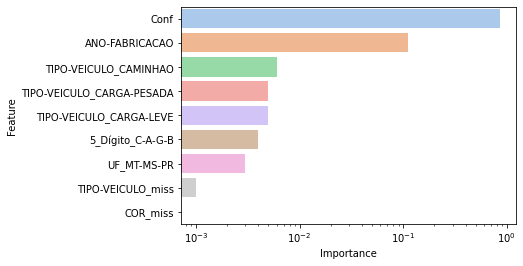

In [247]:
sns.barplot(x = 'Importance', y = 'Feature', data = df_feat_importance_sort,
            ci=False, log=True, palette = 'pastel')

In [248]:
#Duas features mais importantes representam 97%
df_feat_importance['Importance'].astype('float').nlargest(2).sum()

0.976

#### 5.5.6.1 Criação de Modelo ADA Boosting com 2 features

In [249]:
#Construção de DF com apenas duas features - Conf e ANO-FABRICACAO
x_treino_2_feat = x_treino[['Conf','ANO-FABRICACAO']]
x_teste_2_feat = x_teste[['Conf','ANO-FABRICACAO']]
XTESTE2_2_feat = XTESTE2[['Conf','ANO-FABRICACAO']]

In [250]:
#Criação do grid utilizando GridSearchCV com apenas duas features - Conf e ANO-FABRICACAO
ada_grid_2_feat = GridSearchCV(estimator=ada, # estimador a ser utilizado (Ada Boost)
                      param_grid=ada_dict,    # dicionario com parâmetros
                      scoring='precision',    # métrica de validação: precision
                      cv=10)

In [251]:
#Treinando modelo AdaBoost
ada_grid_2_feat.fit(x_treino_2_feat, y_treino)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=101),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [50, 250, 500, 750, 1000],
                         'random_state': [101]},
             scoring='precision')

In [252]:
#Melhores Parâmetros
ada_grid_2_feat.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.5,
 'n_estimators': 1000,
 'random_state': 101}

In [253]:
#Melhor Score(precision)
ada_grid_2_feat.best_score_

0.8997479128976222

In [254]:
#Aplicando modelo sobre a base de teste
predictions_ada_2_feat = ada_grid_2_feat.predict(x_teste_2_feat)

In [255]:
#Classification Report
print(classification_report(y_teste, predictions_ada_2_feat))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       296
           1       0.90      0.86      0.88       291

    accuracy                           0.88       587
   macro avg       0.88      0.88      0.88       587
weighted avg       0.88      0.88      0.88       587



In [256]:
#Matriz de Confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_ada_2_feat)

array([[267,  29],
       [ 42, 249]], dtype=int64)

In [257]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_ada_2_feat_XTESTE2 = ada_grid_2_feat.predict(XTESTE2_2_feat)

In [258]:
#Classification Report
print(classification_report(YTESTE2, predictions_ada_2_feat_XTESTE2))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       246
           1       0.91      0.90      0.90       246

    accuracy                           0.90       492
   macro avg       0.90      0.90      0.90       492
weighted avg       0.90      0.90      0.90       492



In [259]:
#Matriz de Confusão
confusion_matrix(y_true=YTESTE2, y_pred=predictions_ada_2_feat_XTESTE2)

array([[223,  23],
       [ 24, 222]], dtype=int64)

#### 5.5.6.2 Criação de Modelo ADA Boosting com uma única feature

In [260]:
#Construção de DF com apenas uma única feature - Conf
x_treino_1_feat = x_treino_2_feat.drop(['ANO-FABRICACAO'], axis=1)
x_teste_1_feat = x_teste_2_feat.drop(['ANO-FABRICACAO'], axis=1)
XTESTE2_1_feat = XTESTE2_2_feat.drop(['ANO-FABRICACAO'], axis=1)

In [261]:
#Criação do grid utilizando GridSearchCV com apenas uma feature - Conf
ada_grid_1_feat = GridSearchCV(estimator=ada, # estimador a ser utilizado (Ada Boost)
                      param_grid=ada_dict,    # dicionario com parâmetros
                      scoring='precision',    # métrica de validação: precision
                      cv=10)

In [262]:
#Treinando modelo AdaBoost
ada_grid_1_feat.fit(x_treino_1_feat, y_treino)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=101),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [50, 250, 500, 750, 1000],
                         'random_state': [101]},
             scoring='precision')

In [263]:
#Melhores Parâmetros
ada_grid_1_feat.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.5,
 'n_estimators': 1000,
 'random_state': 101}

In [264]:
#Melhor Score (precision)
ada_grid_1_feat.best_score_

0.8816577896647185

In [265]:
#Aplicando modelo sobre a base de teste
predictions_ada_grid_1_feat = ada_grid_1_feat.predict(x_teste_1_feat)

In [266]:
#Classification Report
print(classification_report(y_teste,predictions_ada_grid_1_feat))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       296
           1       0.89      0.78      0.84       291

    accuracy                           0.85       587
   macro avg       0.85      0.85      0.85       587
weighted avg       0.85      0.85      0.85       587



In [267]:
#Matriz de Confusão
confusion_matrix(y_true=y_teste, y_pred=predictions_ada_grid_1_feat)

array([[269,  27],
       [ 63, 228]], dtype=int64)

In [268]:
#Aplicando modelo sobre a segunda base de teste - XTESTE2
predictions_ada_1_feat_XTESTE2 = ada_grid_1_feat.predict(XTESTE2_1_feat)

In [269]:
#Classification Report
print(classification_report(YTESTE2,predictions_ada_1_feat_XTESTE2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       246
           1       0.89      0.83      0.86       246

    accuracy                           0.87       492
   macro avg       0.87      0.87      0.87       492
weighted avg       0.87      0.87      0.87       492



In [270]:
#Matriz de Confusão
confusion_matrix(y_true=YTESTE2, y_pred=predictions_ada_1_feat_XTESTE2)

array([[222,  24],
       [ 42, 204]], dtype=int64)

# 6 Apresentação dos Resultados

In [271]:
precision_ada_treino = precision_score(y_treino, ada_grid.predict(x_treino_voted))
precision_ada_teste = precision_score(y_teste, ada_grid.predict(x_teste_voted))
precision_ada_TESTE2 = precision_score(YTESTE2, ada_grid.predict(XTESTE2))

In [272]:
precision_rf_treino = precision_score(y_treino, rf_grid.predict(x_treino_voted))
precision_rf_teste = precision_score(y_teste, rf_grid.predict(x_teste_voted))
precision_rf_TESTE2 = precision_score(YTESTE2, rf_grid.predict(XTESTE2))

In [273]:
precision_gb_treino = precision_score(y_treino, gb_grid.predict(x_treino_voted))
precision_gb_teste = precision_score(y_teste, gb_grid.predict(x_teste_voted))
precision_gb_TESTE2 = precision_score(YTESTE2, gb_grid.predict(XTESTE2))

In [274]:
precision_lr_treino = precision_score(y_treino, lr_grid.predict(x_treino_voted))
precision_lr_teste = precision_score(y_teste, lr_grid.predict(x_teste_voted))
precision_lr_TESTE2 = precision_score(YTESTE2, lr_grid.predict(XTESTE2))

In [275]:
precision_dt_treino = precision_score(y_treino, dt_grid.predict(x_treino_voted))
precision_dt_teste = precision_score(y_teste, dt_grid.predict(x_teste_voted))
precision_dt_TESTE2 = precision_score(YTESTE2, dt_grid.predict(XTESTE2))

In [276]:
models = pd.DataFrame({
    'Modelo': ['Regressão Logística',
              'Decision Tree', 
              'Random Forest', 
              'Gradient Boosting',
               'ADA Boosting'],
    
     'Precision_Treino': [precision_lr_treino,
                    precision_dt_treino,
                    precision_rf_treino,
                    precision_gb_treino,
                    precision_ada_treino],   
    
    'Precision_Teste': [precision_lr_teste,
                    precision_dt_teste,
                    precision_rf_teste,
                    precision_gb_teste,
                    precision_ada_teste],
    
    'Precision_Teste_2': [precision_lr_TESTE2,
                    precision_dt_TESTE2,
                    precision_rf_TESTE2,
                    precision_gb_TESTE2,
                    precision_ada_TESTE2]

})
model_comp = models.sort_values(by='Precision_Teste_2', ascending=False)
model_comp = model_comp[['Modelo','Precision_Treino','Precision_Teste','Precision_Teste_2']]
model_comp

,Modelo,Precision_Treino,Precision_Teste,Precision_Teste_2
4,ADA Boosting,0.943953,0.935943,0.900000
1,Decision Tree,0.987578,0.920152,0.857143
0,Regressão Logística,0.874453,0.903915,0.840909
3,Gradient Boosting,0.994169,0.914286,0.840000
2,Random Forest,0.995614,0.916968,0.836000


In [277]:
#Matriz de confusão - Modelo Ada Boosting - Primeira Base de Testes
cf_ada=confusion_matrix(y_teste,predictions_ada)
cf_ada

array([[278,  18],
       [ 28, 263]], dtype=int64)

<AxesSubplot:>

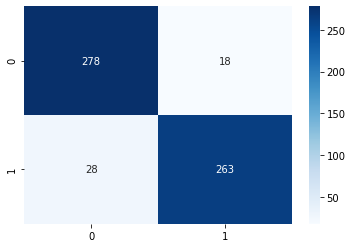

In [278]:
#Matriz de Confusão da Primeira Base de Testes
sns.heatmap(cf_ada, annot=True,cmap='Blues',fmt='')

In [279]:
#Conferência da Quantidade de Leituras Corretas
CountLC = (y_teste == 0).sum()
CountLC

296

In [280]:
#Conferência da Quantidade de Leituras Incorretas
CountLI = (y_teste == 1).sum()
CountLI

291

In [281]:
#Matriz de confusão - Modelo Ada Boosting - Segunda Base de Testes
cf_ada_XTESTE2=confusion_matrix(YTESTE2,predictions_ada_XTESTE2)
cf_ada_XTESTE2

array([[220,  26],
       [ 12, 234]], dtype=int64)

<AxesSubplot:>

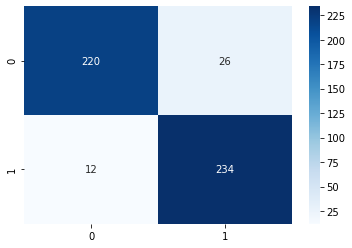

In [282]:
#Matriz de Confusão da Segunda Base de Testes
sns.heatmap(cf_ada_XTESTE2, annot=True,cmap='Blues',fmt='')

In [283]:
#Precision ADA Boosting - Voted Features
precision_ada_treino = precision_score(y_treino, ada_grid.predict(x_treino_voted))
precision_ada_teste = precision_score(y_teste, ada_grid.predict(x_teste_voted))
precision_ada_TESTE2 = precision_score(YTESTE2, ada_grid.predict(XTESTE2))

In [284]:
#Precision ADA Boosting - 2 Features
precision_ada_treino_2_feat = precision_score(y_treino, ada_grid_2_feat.predict(x_treino_2_feat))
precision_ada_teste_2_feat = precision_score(y_teste, ada_grid_2_feat.predict(x_teste_2_feat))
precision_ada_TESTE2_2_feat = precision_score(YTESTE2, ada_grid_2_feat.predict(XTESTE2_2_feat))

In [285]:
#Precision ADA Boosting - 1 Feature
precision_ada_treino_1_feat = precision_score(y_treino, ada_grid_1_feat.predict(x_treino_1_feat))
precision_ada_teste_1_feat = precision_score(y_teste, ada_grid_1_feat.predict(x_teste_1_feat))
precision_ada_TESTE2_1_feat = precision_score(YTESTE2, ada_grid_1_feat.predict(XTESTE2_1_feat))

In [286]:
models_ADA = pd.DataFrame({
    'Modelo': ['Voted Features',
              '2 Features', 
              '1 Feature'],
   
     'Precision_Treino': [precision_ada_treino,
                    precision_ada_treino_2_feat,
                    precision_ada_treino_1_feat],   
    
    'Precision_Teste': [precision_ada_teste,
                    precision_ada_teste_2_feat,
                    precision_ada_teste_1_feat,
                    ],
    
    'Precision_Teste_2': [precision_ada_TESTE2,
                    precision_ada_TESTE2_2_feat,
                    precision_ada_TESTE2_1_feat,
                    ]

})
models_ADA = models_ADA.sort_values(by='Precision_Teste_2', ascending=False)
models_ADA = models_ADA[['Modelo','Precision_Treino','Precision_Teste','Precision_Teste_2']]
models_ADA

,Modelo,Precision_Treino,Precision_Teste,Precision_Teste_2
1,2 Features,0.930303,0.895683,0.906122
0,Voted Features,0.943953,0.935943,0.900000
2,1 Feature,0.918269,0.894118,0.894737


In [287]:
#Matriz de confusão - Modelo Ada Boosting - Duas Features - Segunda Base de Testes
cf_ada_2_feat_XTESTE2=confusion_matrix(YTESTE2, predictions_ada_2_feat_XTESTE2)
cf_ada_2_feat_XTESTE2

array([[223,  23],
       [ 24, 222]], dtype=int64)

<AxesSubplot:>

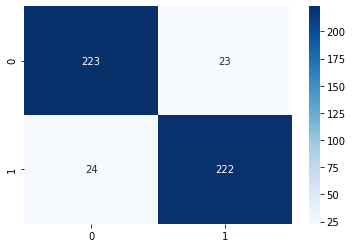

In [288]:
#Matriz de confusão - Modelo Ada Boosting 
#Duas Features - Segunda Base de Testes
sns.heatmap(cf_ada_2_feat_XTESTE2, annot=True,cmap='Blues',fmt='')

In [289]:
#Matriz de confusão - Modelo Ada Boosting - Uma Feature - Segunda Base de Testes
cf_ada_1_feat_XTESTE2=confusion_matrix(YTESTE2, predictions_ada_1_feat_XTESTE2)
cf_ada_1_feat_XTESTE2

array([[222,  24],
       [ 42, 204]], dtype=int64)

<AxesSubplot:>

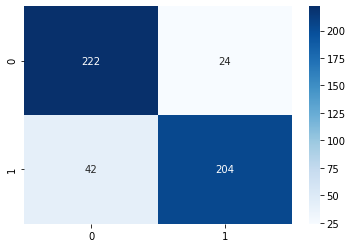

In [290]:
# Matriz de confusão - Modelo Ada Boosting 
#Single Feature - Segunda Base de Testes
sns.heatmap(cf_ada_1_feat_XTESTE2, annot=True,cmap='Blues',fmt='')